In [159]:
m0 = 1.67e-24*2.33; h = 6.626e-27; k = 1.38e-16; gr = 6.67e-8;  \
pc = 3.086e18; au = 1.496e13;
c = 2.998e10; year =86400.0*365;
Msun = 1.99e33; Lsun = 3.826e33; Jy =1.0e-23; Rsun = 6.96e10; Tbg = 2.73; eV = 1.602e-12;
au=1.496e13; pc=3.086e18;
m0=2.33*1.67e-24;gv=6.67e-8;  12345
# self-define is better ?scu2b_rg2

12345

In [ ]:
for i, x in enumerate(la):
    "test:{x}, no:{i}".format{}   
for i, x in sipe

In [125]:
%%time
import importlib
# importlib.reload()
# numpy.reload()

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 20 µs


In [120]:
def test(*args, **kwargs):
    print(args)
    print(kwargs)

In [121]:
test('a', 3, b=4)
sys.path.append('/Users/ls/test/')
sys.path.insert(0, '/Users/ls/test/')
np.rot90(a1)
np.matmul(a1)
sp = np.empty((10), dtype=[('wave', float), ('flux', float)]) 

('a', 3)
{'b': 4}


In [143]:
# sp = np.empty((10), dtype=[('wave', float), ('flux', float)]) 
sp = np.empty(10, dtype=int)

In [144]:
df.plot.scatter()
df['data'].describe()
df.loc[123]
df.iloc[123]
df.dropna(how='any')
df.fillna(value=5)

array([4629601900695021173, 4637176095188300636, 4639267584913734130,
       4640140820429584369, 4640793048639032569, 4642865389843225546,
       4643937754063476315, 4644463899305641864, 4644837205295849167,
       4645240233517517536])

In [209]:
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
# import aplpy as apl
from astropy import wcs
from astropy.io import fits
from spectral_cube import SpectralCube as sc
from matplotlib import colors
from lmfit import minimize, Parameters, Model
from reproject import reproject_interp 

# plotting format properties (aesthetics) :
from matplotlib import rc 
rc("font", family="serif", size=12)
rc("axes", linewidth = 1)
rc("lines", linewidth = 1)
rc("xtick.major", pad = 5, width = 1)
rc("ytick.major", pad = 5, width = 1)
rc("xtick.minor", width = 1)
rc("ytick.minor", width = 1)
rc('ytick', direction='in', labelsize=12)
rc('xtick', direction='in', labelsize=12)
rc('axes', labelsize=12)
plt.rcParams.update({'axes.labelsize': 12})

In [222]:
# scu = sc.read('./orikl_hcop.fits',hdu=0)
scu = sc.read('./scu2b_rg2.fits',hdu=0) # import the 3D data cube.
hdu_sp250 = fits.open('./orikl_sp250.fits')[0] # import the 2D fits data.
w1 = wcs.WCS(hdu_sp250.header)
print(scu)
# print(scu.spectral_axis)
# print(scu.wcs)
# print(wcs.WCS(hdu_sp250.header))

SpectralCube with shape=(150, 109, 70):
 n_x:     70  type_x: RA---TAN  unit_x: deg    range:    83.754477 deg:   83.870001 deg
 n_y:    109  type_y: DEC--TAN  unit_y: deg    range:    -5.458438 deg:   -5.278437 deg
 n_s:    150  type_s: VRAD      unit_s: km / s  range:       -4.316 km / s:      55.284 km / s


In [4]:
# ----------------- after spectral unit conversion, the wcs information is consistently changed  -----------------------
# header information revised:
scu1 = scu.with_spectral_unit(u.km / u.s, rest_value = 356.73424 * u.GHz,  velocity_convention='optical')
# print(scu1.spectral_axis)
# print(wcs.WCS(scu1.header))
# print(wcs.WCS(scu2.header)) # another form

In [ ]:
print(scu.spectral_axis)

In [225]:
# --------------------- moment 0 -------------------------
# ++++ if not squeeze?
scu1_data = np.squeeze(scu1.hdu.data) # make sure the data has no redundant dimensions
scu1_m0 = scu1.moment(order=0)
scu1_m0_img = np.nan_to_num(scu1_m0.hdu.data)  # .astype(float)
# type(scu1_m0)
# np.dtype(scu1_m0[0,0])
# dir(scu1_m0)
# scu1_m0.value

In [11]:
from spectral_cube import SpectralCube as sc

scu = sc.read('./orikl_hcop.fits',hdu=0)
print(scu)
print(scu.spectral_axis)
# print(scu.wcs)

SpectralCube with shape=(7416, 105, 38) and unit=K:
 n_x:     38  type_x: RA---TAN  unit_x: deg    range:    83.746662 deg:   83.889447 deg
 n_y:    105  type_y: DEC--TAN  unit_y: deg    range:    -5.459508 deg:   -5.236409 deg
 n_s:   7416  type_s: FREQ      unit_s: GHz    range:      356.588 GHz:     356.814 GHz
[356.81443339 356.81440288 356.81437236 ... 356.58825354 356.58822303
 356.58819251] GHz


In [13]:
# ----------------- rectify the wcs information ---------------- 
# (356588192514.969-356814433387.075)/7416
# w0 = scu.wcs
w0 = wcs.WCS(scu.header)
sc_data = scu.hdu.data
print(sc_data[0,...])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [16]:
sc_data2 = np.nan_to_num(sc_data) # remove badpoints
iy, ix = np.isnan
scu2 = sc(data=sc_data2,wcs=w0)
print(sc_data2[0,...])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [164]:
print(scu2.spectral_axis)
scu2.wcs

[3.56814433e+11 3.56814403e+11 3.56814372e+11 ... 3.56588254e+11
 3.56588223e+11 3.56588193e+11] Hz


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'FREQ'  
CRVAL : 83.816666666667  -5.3475  356701297695.4001  
CRPIX : 20.22449  52.977551  3709.0  
PC1_1 PC1_2 PC1_3  : -0.0018992493408939  0.00069127022753524  0.0  
PC2_1 PC2_2 PC2_3  : 0.00069127022753516  0.0018992493408946  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  -30511.243709612  
NAXIS : 38  105  7416

In [165]:
# --- after spectral unit conversion, the wcs information is consistently changed  -----
# HCO+ (4-3) f0 =  356.73424 GHz; (13: 346.9983 / GHz)
scu2b = scu2.with_spectral_unit(u.km / u.s, velocity_convention='radio')
print(scu2b.spectral_axis)
wcs.WCS(scu2b.header)

[-67.35260219 -67.32696115 -67.3013201  ... 122.72448136 122.75012241
 122.77576346] km / s


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'VRAD'  
CRVAL : 83.816666666667  -5.3475  27724.401154781  
CRPIX : 20.22449  52.977551  3709.0  
PC1_1 PC1_2 PC1_3  : -0.0018992493408939  0.00069127022753524  0.0  
PC2_1 PC2_2 PC2_3  : 0.00069127022753516  0.0018992493408946  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  25.641047289353  
NAXIS : 38  105  7416

In [148]:
# ================ PC3_3 should not be used to record df or dv. =====================
w1 = scu2.wcs
w1.wcs.pc[2,:] = [0,0,1]
w1.wcs.cdelt[2] = -30511.243709612
scu2b = scu2.with_spectral_unit(u.km / u.s, rest_value=356.73424 * u.GHz,  velocity_convention='radio')
print(scu2b.spectral_axis)
w1
# print(wcs.WCS(scu2.header)) # another form

[-67.39294952 -67.36730846 -67.34166741 ... 122.68415962 122.70980067
 122.73544172] km / s


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'FREQ'  
CRVAL : 83.816666666667  -5.3475  356701297695.4001  
CRPIX : 20.22449  52.977551  3709.0  
PC1_1 PC1_2 PC1_3  : -0.0018992493408939  0.00069127022753524  0.0  
PC2_1 PC2_2 PC2_3  : 0.00069127022753516  0.0018992493408946  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  -30511.243709612  
NAXIS : 38  105  7416

In [166]:
# ------------- integrated HCO+ ---------------
scu2_m0 = scu2b.moment(order=0)
w1 = wcs.WCS(scu2_m0.hdu.header)
scm0 = np.nan_to_num(scu2_m0.hdu.data).astype(float)
# scm0 = scm0[:,::-1]

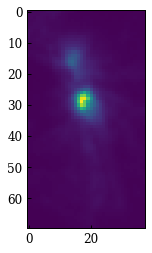

In [167]:
plt.imshow(scm0[10:80,:])

Text(0.5,1,'HCO+ (4-3)')

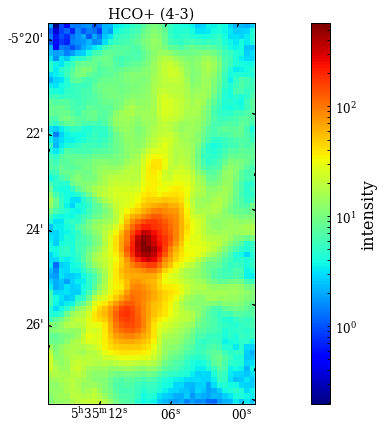

In [171]:
# -------------- coordinate grid ----------------
from matplotlib import colors

fg1 = plt.figure(1,figsize=(10,7)) #
ax = fg1.add_subplot(111, projection = w1)

# vm0 = scm0[10:80,:].min()
vm0 = scm0[10:80,:].min()
vm1 = scm0[10:80,:].max()

# im = ax.imshow(scm0[10:80,:], cmap = 'jet', vmin = vm0, vmax = vm1)
im = ax.imshow(scm0[10:80,:], origin='lower', cmap='jet',
               norm=colors.LogNorm(vmin=vm0, vmax=vm1))
ax.axes.set_aspect('equal')
cbar = plt.colorbar(im, pad =0.1)
cbar.set_label('intensity', size = 16)

# --------------- coordinate grid ---------------------
# ax.coords.grid(color='white')
# ax.coords['ra'].set_axislabel('Right Ascension')
# ax.coords['dec'].set_axislabel('Declination')
ax.set_title('HCO+ (4-3)')

In [172]:
from reproject import reproject_interp 

# -------------------template image-------------------------
hdu_sp250 = fits.open('./orikl_sp250.fits')[0]

# ------------- refine the HDU object ----------------
scu2_m0 = scu2b.moment(order=0)
w1 = wcs.WCS(scu2_m0.hdu.header)
scm0 = np.nan_to_num(scu2_m0.hdu.data).astype(float)
scm0_hdu = fits.ImageHDU(data = scm0, header = w1.to_header())

# -------------- reprojection -----------------
scm0_rp, footprint = reproject_interp(scm0_hdu, hdu_sp250.header)

In [173]:
# scm0_rp = np.nan_to_num(scm0_rp)   # <--------- necessary to run
scm0_rp

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.70481036, 0.79947864, 1.09457136, ...,        nan,        nan,
               nan],
       [0.59648548, 0.45600579, 0.91518368, ...,        nan,        nan,
               nan],
       [0.73433978, 1.05073912, 1.14651587, ...,        nan,        nan,
               nan]])

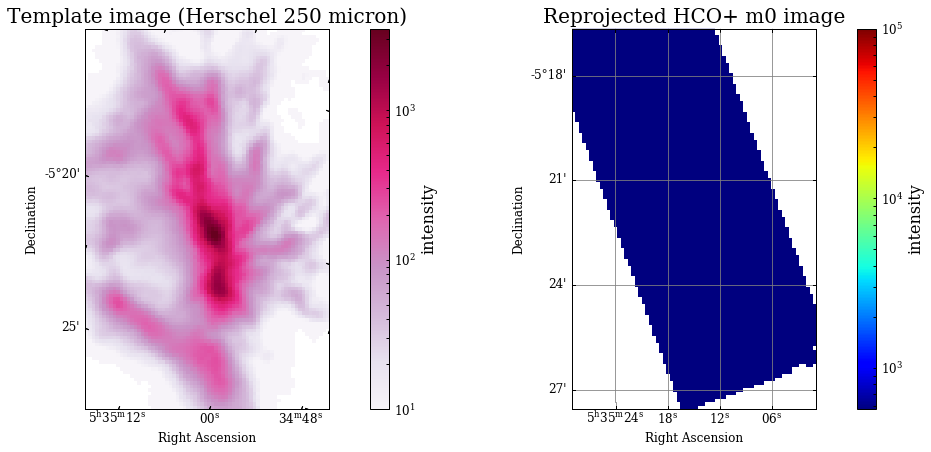

In [174]:
# -------------- plot ----------------
fg1=plt.figure(1,figsize=(16,7))
ax1 = fg1.add_subplot(1,2,1, projection=w1)   # wcs.WCS(hdu_sp250.header)
max0 = hdu_sp250.data.max()
im1 = ax1.imshow(hdu_sp250.data, cmap=plt.cm.PuRd, \
                 norm=colors.LogNorm(vmin=10, vmax=max0))
ax1.axes.set_aspect('equal')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Template image (Herschel 250 micron)' , size = 20)
cbar = plt.colorbar(im1, pad =0.1)
cbar.set_label('intensity', size = 16)

vm0 = 1e5
vm1 = scm0[10:80,:].max()
ax1 = fg1.add_subplot(1,2,2, projection=wcs.WCS(hdu_sp250.header))
max0 = scm0_rp.max()
im1 = ax1.imshow(scm0_rp, cmap=plt.cm.jet, \
                norm=colors.LogNorm(vmin=vm0, vmax=vm1))
lvs = np.arange(0.1,1,0.2)*hdu_sp250.data.max()*0.3
# ax1.contour(hdu_sp250.data,levels=lvs,colors='magenta',linewidths=1.0)
ax1.axes.set_aspect('equal')

ax1.coords.grid(color='gray')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Reprojected HCO+ m0 image',size = 20)
cbar = plt.colorbar(im1, pad =0.1)
cbar.set_label('intensity', size = 16)

[-67.35260219 -67.32696115 -67.3013201  ... 122.72448136 122.75012241
 122.77576346] km / s
(7416, 105, 38)


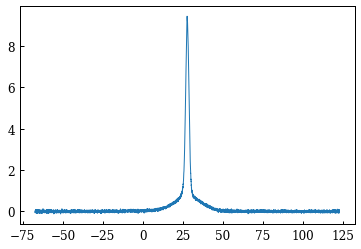

In [175]:
# ---------------------- regriding the entire cube ---------------------
# 1. inspecting the wcs information and the central spectra
print(scu2b.spectral_axis)
w1 = wcs.WCS(scu2b.header)
print(np.shape(scu2b.hdu.data))
Tb_v1 = np.mean(scu2b.hdu.data[:,45:55,15:25],axis=(1,2))
plt.plot(scu2b.spectral_axis.value,Tb_v1)

# velocity axis tooooooo long ----> cutoff needed. 

(2341, 105, 38)


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'VRAD'  
CRVAL : 83.816666666667  -5.3475  27724.401154781  
CRPIX : 20.22449  52.977551  1277.0  
PC1_1 PC1_2 PC1_3  : -0.0018992493408939  0.00069127022753524  0.0  
PC2_1 PC2_2 PC2_3  : 0.00069127022753516  0.0018992493408946  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  25.641047289353  
NAXIS : 38  105  2341

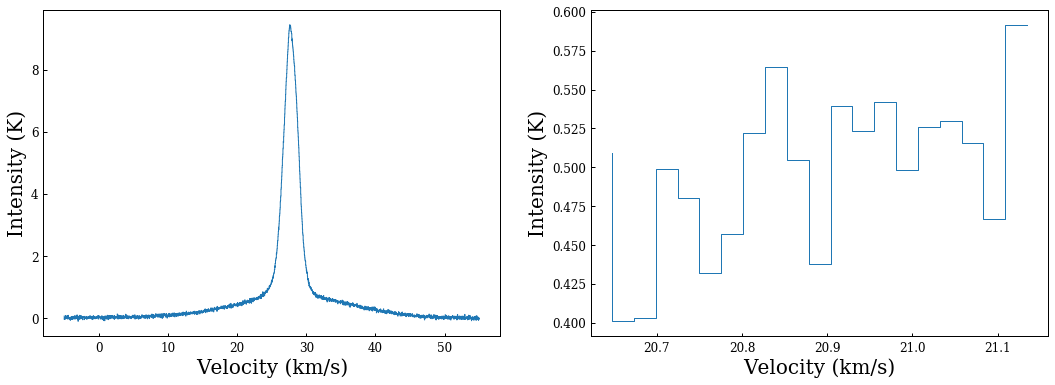

In [176]:
# ----------------- cut the useful spectral range ------------------------
scu2b_slab = scu2b.spectral_slab(-5 * u.km/u.s, 55 * u.km/u.s)   # exclude the emission-free channels.
Tb_v1 = np.mean(scu2b_slab.hdu.data[:, 45:55, 15:25], axis=(1,2))

# ----------------- inspecting the spectra -----------------
fg1=plt.figure(1,figsize=(18,6))
ax1 = fg1.add_subplot(1,2,1)
ax1.plot(scu2b_slab.spectral_axis.value,Tb_v1,drawstyle='steps')
# ax1.plot(Tb_v1)
plt.xlabel('Velocity (km/s)',size=20)
plt.ylabel('Intensity (K)',size=20)

ax2 = fg1.add_subplot(1,2,2)
ax2.plot(scu2b_slab.spectral_axis.value[1000:1020],Tb_v1[1000:1020],drawstyle='steps')
plt.xlabel('Velocity (km/s)', size=20)
plt.ylabel('Intensity (K)', size=20)

w1c = wcs.WCS(scu2b_slab.header)
print(np.shape(scu2b_slab.hdu.data))
w1c
#print(scu2b_slab.spectral_axis)

In [230]:
# ---------------- regriding the cube: fist reduce the data size ----------------------
(v0,v1) = scu2b_slab.spectral_axis[[0,-1]].value 
_wcs = scu2b_slab.wcs
_data = np.nan_to_num(scu2b_slab.hdu.data)   # routine convert   
# ---- print parameters:
print(_wcs.wcs.crval)
print('v0=',v0,'v1=',v1)
print(np.shape(_data))  
_wcs     # still nv=7416, but already changed.

[ 8.38166667e+01 -5.34750000e+00  2.77244012e+04]
v0= -4.993575186433485 v1= 55.006475470652184
(2341, 105, 38)


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'VRAD'  
CRVAL : 83.816666666667  -5.3475  27724.401154780753  
CRPIX : 20.22449  52.977551  1277.0  
PC1_1 PC1_2 PC1_3  : -0.0018992493408939  0.00069127022753524  0.0  
PC2_1 PC2_2 PC2_3  : 0.00069127022753516  0.0018992493408946  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  25.64104728935285  
NAXIS : 38  105  7416

In [231]:
# ------------- new WCS with lower velocity resolution: -------------------
# [nx,ny] = _wcs._naxis[0:2]   # not reliable
ny,nx = np.shape(_data)[1:]

dv = 0.4 # km/s
nv = int((v1-v0)/dv)
v_chan0 = _wcs.wcs.crval[2]/1000 # km/s
chan0 = int((v_chan0-v0)/dv)

w1_rg = wcs.WCS(_wcs.to_header() )
w1_rg.wcs.cdelt[2] = dv*1000 # m/s
w1_rg.wcs.crval[2] = v_chan0*1000 # m/s
w1_rg.wcs.crpix[2] = chan0
w1_rg._naxis = [nx,ny,nv]

In [227]:
w1_rg
# channels: 7416 ----> 150

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'VRAD'  
CRVAL : 83.816666666667  -5.3475  27724.401154780753  
CRPIX : 20.22449  52.977551  81.0  
PC1_1 PC1_2 PC1_3  : -0.0018992493408939  0.00069127022753524  0.0  
PC2_1 PC2_2 PC2_3  : 0.00069127022753516  0.0018992493408946  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  400.0  
NAXIS : 40  25  150

In [232]:
# n_chan combine and reduce: reproject and output fits:
from reproject import reproject_interp

_data2, _fp = reproject_interp((_data,_wcs), output_projection=w1_rg, shape_out=(nv,ny,nx)) # shape_out order !!!!!
_data2 =  np.nan_to_num(_data2)
scu2b_rg = sc(data=_data2,wcs=w1_rg)
scu2b_rg = scu2b_rg.with_spectral_unit(u.km / u.s)
# scu2b_rg.write('hcop_rg.fits', format='fits')

Text(0,0.5,'Intensity (K)')

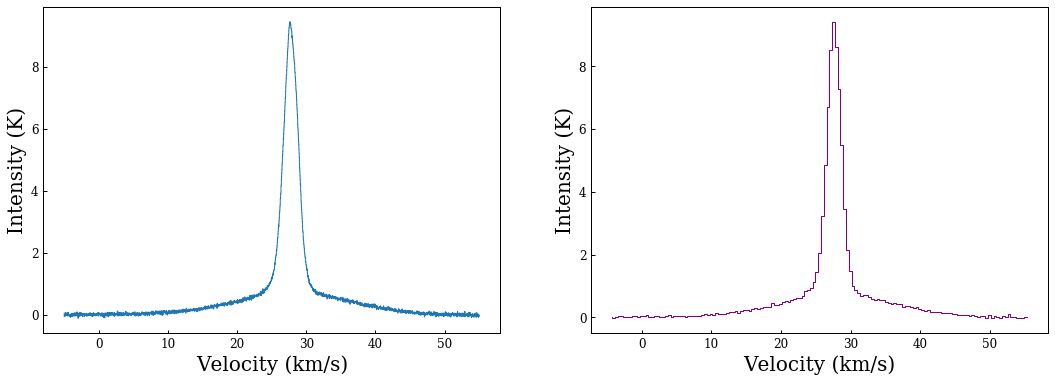

In [233]:
# ----------------- inspecting the spectra -----------------

Tb_v1 = np.mean(scu2b_slab.hdu.data[:,45:55,15:25], axis=(1,2) )
Tb_v2 = np.mean(scu2b_rg.hdu.data[:,45:55,15:25], axis=(1,2) )

fg1=plt.figure(1,figsize=(18,6))
ax1 = fg1.add_subplot(1,2,1)
ax1.plot(scu2b_slab.spectral_axis.value, Tb_v1, drawstyle='steps')
# ax1.plot(scu2b_rg.spectral_axis.value, Tb_v2, marker='o',c='red')
# ax1.plot(Tb_v1)
plt.xlabel('Velocity (km/s)',size=20)
plt.ylabel('Intensity (K)',size=20)

ax2 = fg1.add_subplot(1,2,2)
ax2.plot(scu2b_rg.spectral_axis.value, Tb_v2, drawstyle='steps', c='purple')
# ax2.scatter(scu2b_rg.spectral_axis.value, Tb_v2, marker='o')
# ax2.axis([26,30,3,10])
plt.xlabel('Velocity (km/s)',size=20)
plt.ylabel('Intensity (K)',size=20)

# print(scu2b_rg.wcs)
# print(scu2b_rg.spectral_axis)
# print(scu2b_slab.spectral_axis)

In [234]:
_data = np.nan_to_num(scu2b_rg.hdu.data).astype(float)
_w1 = scu2b_rg.wcs
_w2 = wcs.WCS(hdu_sp250.header)
ny,nx = np.shape(hdu_sp250.data)  # not hdu2.hdu.data, already an HDU object !!!
nv = len(_data[:,0,0])
_w2

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.80303047904884  -5.381773446951432  
CRPIX : 41.0  47.0  
CD1_1 CD1_2  : -0.001666666666667  -0.0  
CD2_1 CD2_2  : -0.0  0.001666666666667  
NAXIS : 70  109

In [235]:
# ----------------------- construct the new template wcs using two different files --------------------
_w1 = scu2b_rg.wcs
_w3 = wcs.WCS(_w1.to_header(),naxis=3)
_w3._naxis = [0,0,0]
_w3.wcs.ctype = ['RA---TAN',  'DEC--TAN',  'VRAD' ]
_w3.wcs.crval = [_w2.wcs.crval[0], _w2.wcs.crval[1], _w1.wcs.crval[2]]
_w3.wcs.crpix = [_w2.wcs.crpix[0], _w2.wcs.crpix[1], _w1.wcs.crpix[2]]
_w3.wcs.cdelt = [_w2.wcs.cd[0,0], _w2.wcs.cd[1,1], _w1.wcs.cdelt[2]]
_w3.wcs.pc = np.identity(3)
_w3
# _w3 has no naxis, should be assigned.

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'VRAD'  
CRVAL : 83.80303047904884  -5.381773446951432  27724.401154780753  
CRPIX : 41.0  47.0  81.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.001666666666667  0.001666666666667  400.0  
NAXIS : 0  0  0

In [236]:
# ------------------ reproject the RA, Dec axis -----------------------
_data, _fp = reproject_interp(scu2b_rg.hdu, output_projection=_w3, shape_out=(nv,ny,nx) )
_data = np.nan_to_num(_data)
scu2b_rg2 = sc(data=_data,wcs=_w3)

In [237]:
print(scu2b_rg2) # check if all right.
# print(wcs.WCS(scu2b_rg2.hdu))
scu2b_rg2.wcs
# naxis missing, can be added.

SpectralCube with shape=(150, 109, 70):
 n_x:     70  type_x: RA---TAN  unit_x: deg    range:    83.754477 deg:   83.870001 deg
 n_y:    109  type_y: DEC--TAN  unit_y: deg    range:    -5.458438 deg:   -5.278437 deg
 n_s:    150  type_s: VRAD      unit_s: m / s  range:    -4275.599 m / s:   55324.401 m / s


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'VRAD'  
CRVAL : 83.80303047904884  -5.381773446951432  27724.401154780753  
CRPIX : 41.0  47.0  81.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.001666666666667  0.001666666666667  400.0  
NAXIS : 0  0  0

In [238]:
# if want to update wcs._naxis: 
_w = wcs.WCS(scu2b_rg2.hdu.header)
scu2b_rg2 = sc(data=_data, wcs=_w)
scu2b_rg2 = scu2b_rg2.with_spectral_unit(u.km / u.s)
print(np.shape(scu2b_rg2.hdu.data))
print(scu2b_rg2.spectral_axis[0:5])
# print(np.shape(hdu_sp250.data))
scu2b_rg2.wcs

(150, 109, 70)
[-4.27559885 -3.87559885 -3.47559885 -3.07559885 -2.67559885] km / s


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'VRAD'  
CRVAL : 83.803030479049  -5.3817734469514  27724.401154780753  
CRPIX : 41.0  47.0  81.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.001666666666667  0.001666666666667  400.0  
NAXIS : 70  109  150

Text(0,0.5,'Temperature (K)')

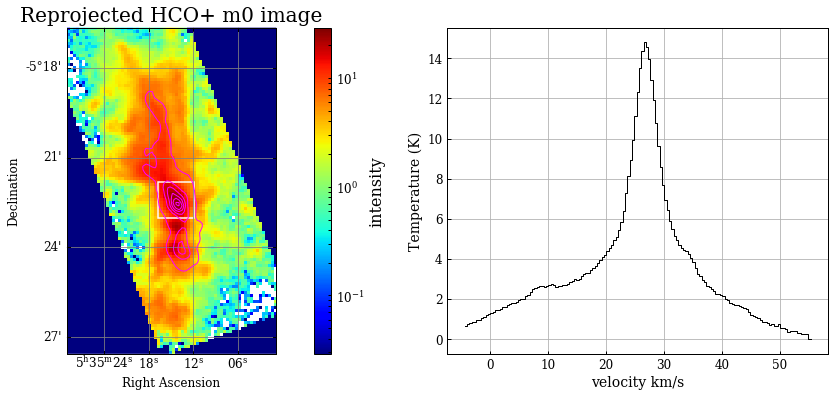

In [239]:
import matplotlib.patches as patches

#----box center and width------
x0,y0 = 30,45
xw,yw = 12,12
#------------------------------

fg1=plt.figure(1,figsize=(15,6))
ax1 = fg1.add_subplot(1,2,1, projection=wcs.WCS(hdu_sp250.header))

_Tb_m = scu2b_rg2.hdu.data
vm0 = _Tb_m.max()*0.001
vm1 = _Tb_m.max()
im1 = ax1.imshow(_Tb_m[80,:,:], cmap='jet', \
                norm=colors.LogNorm(vmin=vm0, vmax=vm1))
lvs = np.arange(0.1,1.4,0.2)*hdu_sp250.data.max()*0.9
ax1.contour(hdu_sp250.data,levels=lvs,colors='magenta',linewidths=1.0)

ax1.coords.grid(color='gray')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Reprojected HCO+ m0 image',size = 20)
ax1.axes.set_aspect('equal')
cbar = plt.colorbar(im1, pad =0.1)
cbar.set_label('intensity', size = 16)
pt1 = patches.Rectangle((x0,y0), width=xw, height=yw, angle=0, \
                          fc='none', ec='white', lw=1.5)
ax1.add_patch(pt1)

# -------------spectrum display---------------  
ax1 = fg1.add_subplot(1,2,2)
sp_v = scu2b_rg2.spectral_axis.value
Tb_v = _Tb_m[:, y0:(y0+yw), x0:(x0+xw)].mean(axis=(1,2))
ax1.plot(sp_v, Tb_v,'k',drawstyle='steps')
plt.grid(True)
ax1.set_xlabel('velocity km/s',fontsize=14)
ax1.set_ylabel('Temperature (K)',fontsize=14)

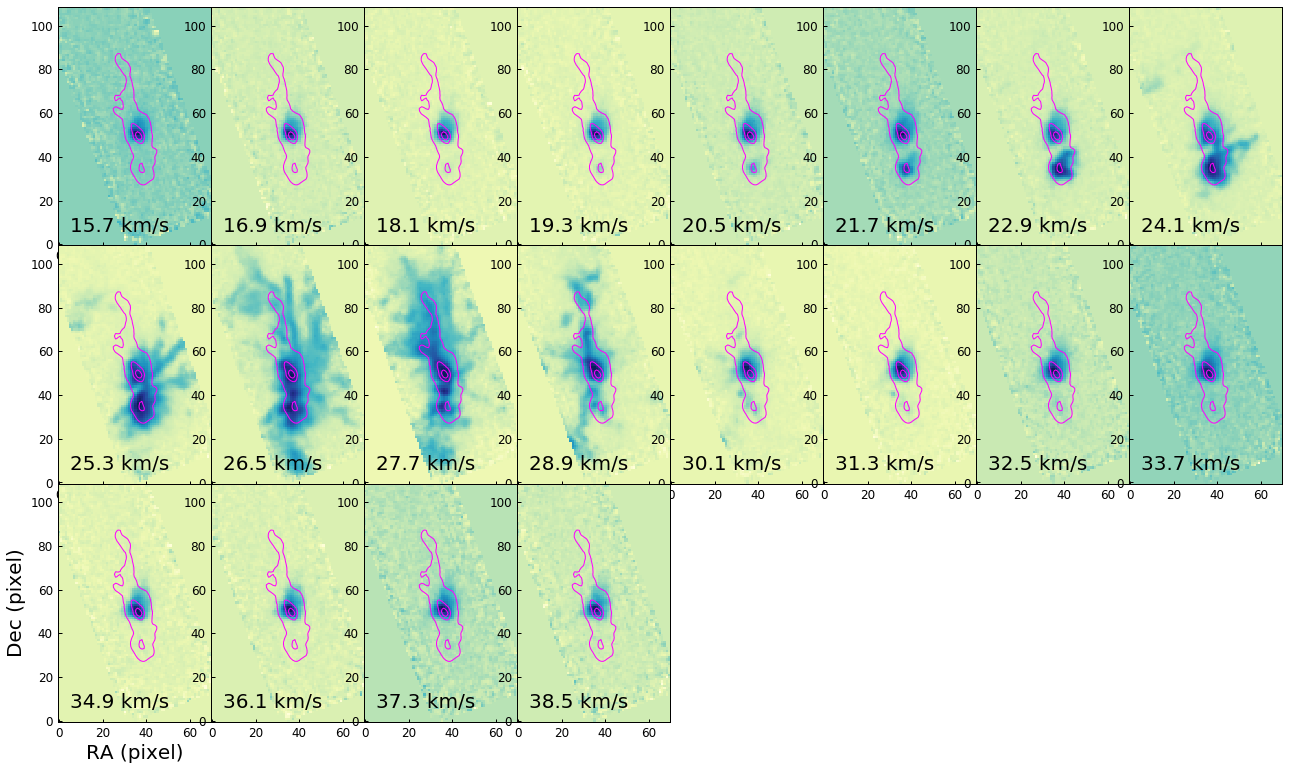

In [15]:
hdu_sp250 = fits.open('./orikl_sp250.fits')[0]
scu2b_rg2 = sc.read('./scu2b_rg2.fits',hdu=0)

# ------------------------ channel map --------------------------
Tb_m = scu2b_rg2.hdu.data  # extract the data matrix
max0 = np.max(Tb_m)

lvs = np.arange(0.1,1.4,0.4) * hdu_sp250.data.max() * 0.9 # contour level
vchan0 = scu2b_rg2.spectral_axis.value

nsy,nsx = np.shape(Tb_m[0,:,:])
ny,nx = 3,8
# figure height-width ratio depends on element panel size(nsy,nsx) and panel array (ny,nx) :
ryx = (nsy*ny*1.0)/(nsx*nx*1.0) 
x_width = 17

# %matplotlib inline
fig = plt.figure(1,figsize=(x_width,x_width*ryx)) # 
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.rc("font", family="Sans", size=15)

# Tb_m_log = np.log10(Tb_m-Tb_m.min()+Tb_m.max()*0.1)
Tb_m_log = np.log10(np.abs(Tb_m-Tb_m.min()+Tb_m.max()*0.1))

n1,dn = 50,20
nstep = 3
# iteration over the velocity channels:
for i in np.arange(0,dn):
    ax1 = fig.add_subplot(ny,nx,i+1)
    Tb_chan = Tb_m_log[i*nstep+n1,:,:]
    ax1.imshow(Tb_chan, origin='lower', cmap='YlGnBu')
    ax1.contour(hdu_sp250.data, levels=lvs, colors='magenta',linewidths=1.0)
    ax1.axes.set_aspect('equal')
    ax1.text(5, 4, '%.1f'%vchan0[i*nstep+n1] +' km/s', \
         horizontalalignment='left',verticalalignment='bottom',fontsize=20)
    if i!=nx*(ny-1):
        #ax1.set_xticklabels([])
        #ax1.set_yticklabels([])
        pass
    else:
        ax1.set_xlabel('RA (pixel)',fontsize=20)
        ax1.set_ylabel('Dec (pixel)',fontsize=20)

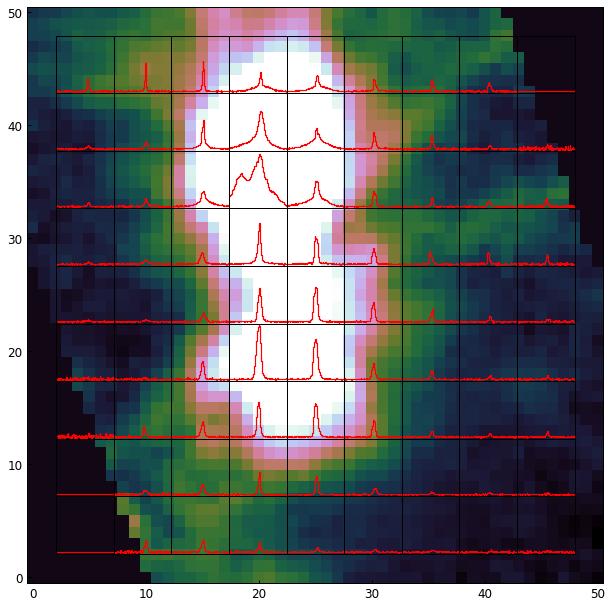

In [504]:
# ------------------------ grid map --------------------------
# %matplotlib inline
fs = 1          # figure size - screen unit
y0,x0 = 15,15;  # mapping region origin - unit: pixel
wp = 50         # mapping region width - pixel
bs = 5         # grid width - pixel
boxStep = bs*1.0/wp; # grid width - screen unit
nw = int(wp*1.0/bs) # grid pixel amount.

sp_v = scu2b_rg2.spectral_axis.value
_Tb_m = scu2b_rg2.hdu.data
_Tb_m0 = np.mean(scu2b_rg2.hdu.data, axis=0)

fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_axes([0, 0, 1, 1])
_Tb_m0s = _Tb_m0[y0:(y0+wp+1),x0:(x0+wp+1)]
max0 = _Tb_m0s.max()
# im1 = ax1.pcolor(_Tb_m0s, cmap='cubehelix', norm=colors.LogNorm(vmin=0.01, vmax=max0))
vm0,vm1 = _Tb_m0s.min(), _Tb_m0s.mean()*2
im1 = ax1.imshow(_Tb_m0s, cmap='cubehelix', origin='lower', vmin=vm0, vmax=vm1)
# +++ update:
# vm0,vm1 = np.log10(_Tb_m0s.max())-2, np.log10(_Tb_m0s.max())
# im1 = ax1.imshow(np.log10(np.abs(_Tb_m0s)+1e-10), cmap='cubehelix', origin='lower')
    
for i in range(1,nw):
    for j in range(1,nw):
        ax = fig.add_axes([(j-0.5)*boxStep, (i-0.5)*boxStep, \
                           boxStep, boxStep])
        ax.set_facecolor('None')
        ax.set_xlim(-5, 55)
        ax.set_ylim(-1, 25)
        ax.tick_params(size = 0)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        _Tb_v = _Tb_m[:, y0+i*bs, x0+j*bs]
        ax.plot(sp_v, _Tb_v, color = 'red', \
                linewidth = 1.2, drawstyle = 'steps-mid')

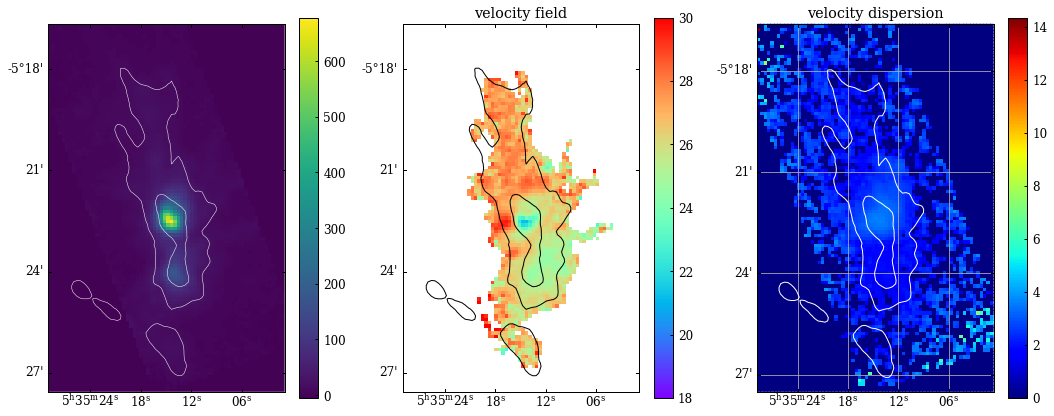

In [240]:
# --------------------------------moment map-------------------------------
# +++ mask
fg1 = plt.figure(1, figsize=(18,7))
lvs = np.arange(0.05,0.4,0.2) * hdu_sp250.data.max()*0.9

ax1 = fg1.add_subplot(1,3,1, projection=wcs.WCS(hdu_sp250.header))
scu2_m0 = scu2b_rg2.moment(order=0)  # moment0: integrated intensity
# scu2_m0 = scu2b_msk.moment(order=0)  # moment0: integrated intensity
scu2_m0 = scu2_m0.hdu.data
min0,max0 = np.min(scu2_m0), np.max(scu2_m0) # upper and lower limits for the color image.
im1 = ax1.imshow(scu2_m0)  # origin='lower'
ax1.axes.set_aspect('equal') # let pixel be square, no elongation or flattening.
ax1.contour(hdu_sp250.data, levels=lvs, linewidths=0.5, colors='white')
plt.colorbar(im1)

mask = scu2_m0 > 6     # mask define  
scu2b_msk = scu2b_rg2.with_mask(mask)

ax1 = fg1.add_subplot(1,3,2, projection=wcs.WCS(hdu_sp250.header))
scu2_mi = scu2b_msk.moment(order=1)  # moment1: velocity field

scu2_mi = np.nan_to_num(scu2_mi.hdu.data)
min0,max0 = np.min(scu2_mi), np.max(scu2_mi)
scu2_mi_mask = np.ma.masked_where(scu2_m0<scu2_m0.max()*0.02, scu2_mi)
im1 = plt.imshow(scu2_mi_mask, cmap='rainbow', origin='lower', vmin=18, vmax=30)  # +++

ax1.contour(hdu_sp250.data, levels=lvs, linewidths=1.0, colors='black')
ax1.axes.set_aspect('equal')
ax1.set_title('velocity field')
plt.colorbar(im1)

ax1 = fg1.add_subplot(1,3,3, projection=wcs.WCS(hdu_sp250.header))
# scu2_mi = scu2b_rg2b.moment(order=2) # moment2: velocity dispersion
scu2_mi = scu2b_rg2.linewidth_sigma() # moment2: velocity dispersion, linewidth_sigma() seems to work better.
scu2_mi = np.abs(np.nan_to_num(scu2_mi.hdu.data))
scu2_mi = np.sqrt(scu2_mi)
min0,max0 = np.min(scu2_mi), np.max(scu2_mi)
im1 = ax1.pcolor(scu2_mi, cmap=plt.cm.jet, \
                norm=colors.Normalize(vmin=min0, vmax=max0))
ax1.contour(hdu_sp250.data, levels=lvs, linewidths=1.0, colors='white')
ax1.axes.set_aspect('equal')
ax1.set_title('velocity dispersion')
plt.colorbar(im1)

In [251]:
scu2b_rg2 = sc.read('./scu2b_rg2_good.fits',hdu=0)
scu2_mi = scu2b_rg2.moment(order=0)  # moment0: integrated intensity
scu2_mi = scu2_mi.hdu.data
map0_area = scu2_mi[25:65,25:50].copy()
#  xxx.copy() is important !!!! otherwise the original data will be reivsed !!!!

In [ ]:
map0_area = scu2_mi[25:65,25:50]
map0_area

In [252]:
# plt.imshow(scu2b_rg2)
np.shape(map0_area)

(40, 25)

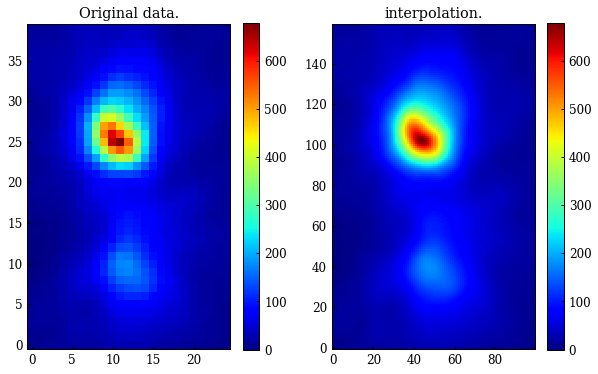

In [253]:
# ------------------------- interpolation ------------------------------
from scipy import interpolate

nx, ny = np.shape(map0_area)
# xm, ym = np.mgrid[-2:2:nx*1j, -2:2:ny*1j]
xm, ym = np.linspace(-2,2,nx), np.linspace(-2,2,ny)
nt = 4
xm2, ym2 = np.linspace(-2,2,nx*nt), np.linspace(-2,2,ny*nt)
tck = interpolate.RectBivariateSpline(xm,ym,map0_area, s=0.3, kx=3, ky=3)
map0_area2 = tck(xm2, ym2)
#map0_area2 = np.transpose(map0_area2)

#---------- original plot --------------
fig=plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(1,2,1)
im0 = ax0.imshow(map0_area,origin='lower', cmap='jet',vmin=0,vmax=map0_area.max())
plt.colorbar(im0)
ax0.axis('on')
plt.title("Original data.")

ax0 = fig.add_subplot(1,2,2)
im0 = ax0.imshow(map0_area2,origin='lower', cmap='jet',vmin=0,vmax=map0_area.max())
ax0.axis('on')
plt.title("interpolation.")
plt.colorbar(im0)

In [508]:
x = np.arange(4)
y =  np.arange(4)
X, Y = np.meshgrid(x,y)
print(X)
print(Y)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


In [192]:
# FFT 变换与滤波
# artifical signal:
def gau_fc(t_arr, c0, t0, dt):
    gau0_arr = c0 * np.exp(-(t_arr - t0) ** 2 / (2 * dt ** 2))
    return gau0_arr
    
# sampling period:
t_arr = np.arange(-3, 3, 0.03)

# noise:
c0, t0, dt = 2, 0.3, 1.2
f_noise = np.array([4, 5])
noise0_arr = 0.3 * c0 * np.cos(t_arr * 2 * np.pi * f_noise[0])
noise1_arr = 0.5 * c0 * np.cos(t_arr * 2 * np.pi * f_noise[1])
# +++ cos, 相位变到虚部。

signal0_arr = gau_fc(t_arr, c0, t0, dt)
signal_arr = signal0_arr + noise0_arr + noise1_arr

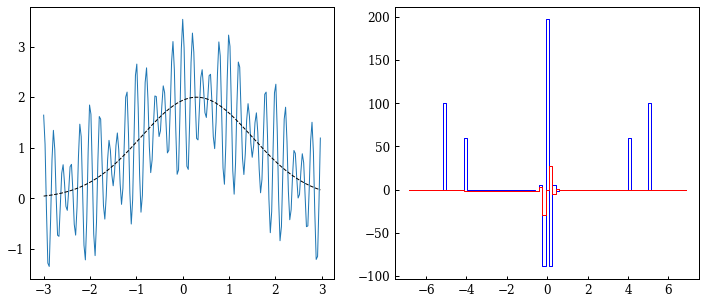

In [193]:
sample_interval = np.mean(t_arr[1:] - t_arr[0:-1])
sample_freq = 1./sample_interval
n_sig = len(signal_arr)

y_ft = np.fft.fft(signal_arr)
y_fts = np.fft.fftshift(y_ft)   

# Nyquist Priciple ----> frequence range on the FFT domaine
f1 = (n_sig/2 + 1) / n_sig
freq_arr = np.linspace(-f1, f1, n_sig) * sample_freq   # fft frequency axis
#---------------------------------------------

i_df = np.where(np.abs(freq_arr)<7)[0]
fig = plt.figure(figsize=(12,5))

ax0 = fig.add_subplot(1, 2, 1)
ax0.plot(t_arr, signal_arr)
ax0.plot(t_arr, signal0_arr, 'k--')

ax0 = fig.add_subplot(1, 2, 2)
ax0.plot(freq_arr[i_df], np.fft.fftshift(y_ft.real)[i_df], 'b-', drawstyle='steps')
ax0.plot(freq_arr[i_df], np.fft.fftshift(y_ft.imag)[i_df]-1, 'r-', drawstyle='steps')
plt.show()

In [ ]:
freq_arr

In [194]:
# ++++ filter width affect the output
def filter_fc(freq_arr, y_ft, f_c, df):
    ix_arr = np.where(np.abs(np.abs(freq_arr)-f_c) <= df)[0]
    y_flt = np.fft.fftshift(y_ft)
    y_flt[ix_arr] = (y_ft[ix_arr[0]-1] + y_ft[ix_arr[-1]+1])/2
    # y_flt[ix_arr] = 0
    return np.fft.fftshift(y_flt)

y_flt0 = filter_fc(freq_arr, y_ft, 4, 0.8)
# y_flt1 = filter_fc(freq_arr, y_flt0, 5, 0.8)
y_flt1 = y_flt0

y_ifft = np.fft.ifft(y_flt1, n=len(t_arr))

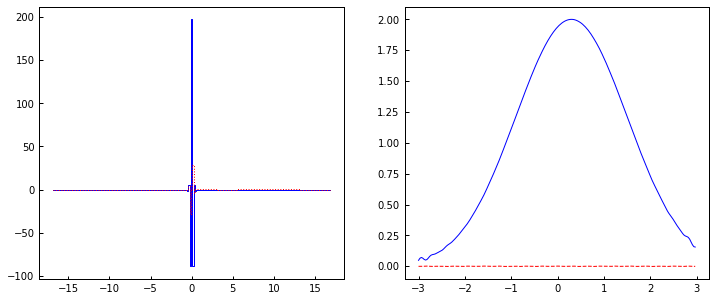

In [169]:
fig = plt.figure(figsize=(12,5))

ax0 = fig.add_subplot(1, 2, 1)
ax0.plot(freq_arr, np.fft.fftshift(y_flt1.real), 'b-', drawstyle='steps')
ax0.plot(freq_arr, np.fft.fftshift(y_flt1.imag), 'r:', drawstyle='steps')

ax0 = fig.add_subplot(1, 2, 2)
ax0.plot(t_arr, y_ifft.real, 'b-')
ax0.plot(t_arr, y_ifft.imag, 'r--')
plt.show()

In [509]:
# -------------------------- restoring the image from non-uniform sampling ----------------- 
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)

# function to generate artifical test data:
def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

T = f(X, Y)
# Choose npts random point from the discrete domain of our model function
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)
fp = f(px,py)

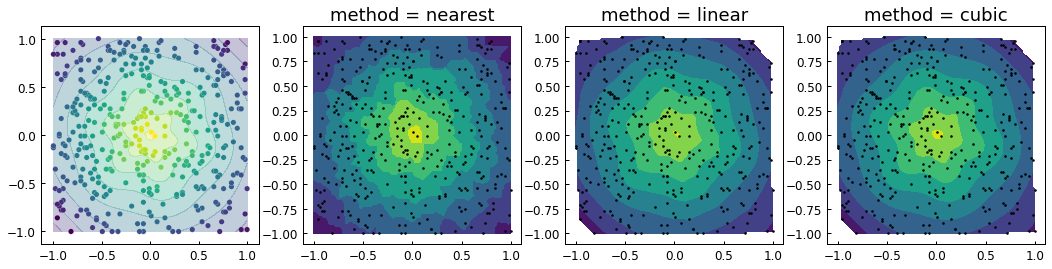

In [510]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
# Plot the model function and the randomly selected sample points
ax[0].contourf(X, Y, T, alpha=0.3)
sc = ax[0].scatter(px, py, c=fp, marker='o', s=30, cmap='viridis', edgecolor='white', linewidth=0.2)
# ax[0].set_title('Sample points on f(X,Y)')
# cbaxes = fig.add_axes([0.14, 0.78, 0.13, 0.04]) 
# cb = plt.colorbar(sc,cax=cbaxes,orientation='horizontal')

# aspect=30,orientation='horizontal', shrink=0.8, pad=0.1,fraction=0.1)
# use_gridspec=False
# anchor=(0,0)

# Interpolate using three different methods and plot
# 'nearest', 'linear', 'cubic'
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    ax[i+1].contourf(X, Y, Ti)
    ax[i+1].scatter(px, py, c='k', alpha=0.9, marker='.', s=10)  #  cmap='viridis', edgecolor='none'
    ax[i+1].set_title('method = {}'.format(method))

plt.show()

In [511]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons, start=1)) 

[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]

In [512]:

from astropy.io import fits
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
from scipy import interpolate

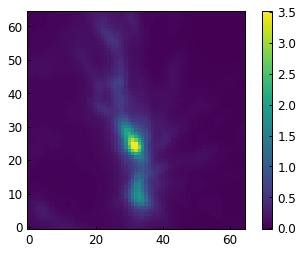

In [513]:
# select an area for clump-find algorithm
% matplotlib inline
map_in = hdu_sp250.data[25:90,5:70]/1000
fg1=plt.figure(figsize=(6,4))
ax1 = fg1.add_subplot(1,1,1)
im1 = ax1.imshow(map_in,origin='lower')
plt.colorbar(im1)

In [515]:
from pycupid import clumpfind, fellwalker, reinhold, gaussclumps

#--------------Fellwalker parameters------------
par0=[0.5,0.3,3] 
rms=0.01
def cfg_set(mh,ns,mj):
    cfg = dict()
    cfg['MINHEIGHT']=mh  # only identify the clumps with peak stronger than mh.
    cfg['NOISE']=ns # clumps boundary stronger than nh.
    cfg['ALLOWEDGE']=0 # 0: clumps cannot reach the image edge.
    cfg['CLEANITER']=2 # iteration number in calculation.
    cfg['MINDIP']=0.2 # neighbouring clumps should have a dip deepter than this.
    cfg['MAXJUMP']=mj # clump distance more separated than mj (pixels.).
    cfg['FLATSLOPE']=1.0e-04 # set small to pick up very weak clumps.
    return cfg

#-----------identified cores-------------
# par0[0],par0[1],par0[2]
out0_fw = fellwalker(map_in, rms, cfg_set(par0[0],par0[1],par0[2]))
out0_fw[out0_fw < out0_fw.min()+0.5] = 0
out0_fw = np.transpose(out0_fw).astype(int)

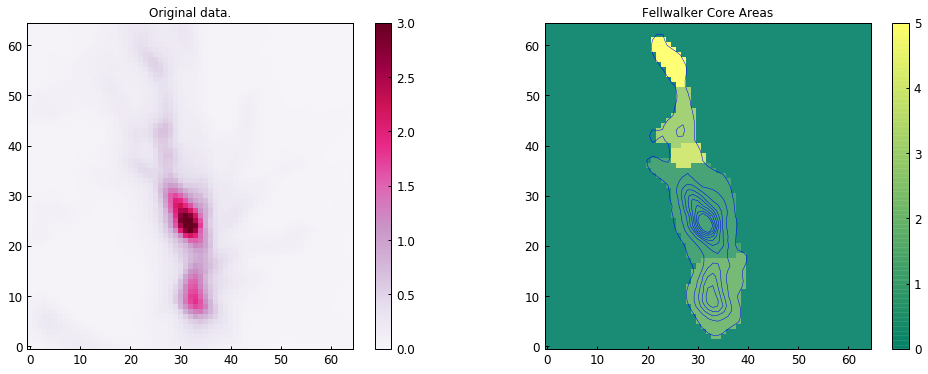

In [517]:
#----------original plot--------------
# note: define ax object ---- color bar selection
fig=plt.figure(figsize=(17,6))
ax0 = fig.add_subplot(1,2,1)
im0 = ax0.imshow(map_in,origin='lower', cmap='PuRd',vmin=0,vmax=3)  # +++++
plt.colorbar(im0)
ax0.axis('on')
plt.title("Original data.")
#----------fw core map----------------
ax = fig.add_subplot(1,2,2)
im1=ax.imshow(out0_fw, origin='lower',interpolation='nearest', 
              cmap='summer',alpha=0.9) # plt.cm.gist_ncar_r
lvs = np.arange(0.1,1,0.1)*map_in.max()*0.9
ax.contour(map_in,levels=lvs,colors='jet',linewidths=0.5)
ax.axis('on')
plt.title('Fellwalker Core Areas')
plt.colorbar(im1)

In [ ]:
np.dtype(out0_fw[0,0])

The total flux is 216.586 Jy.


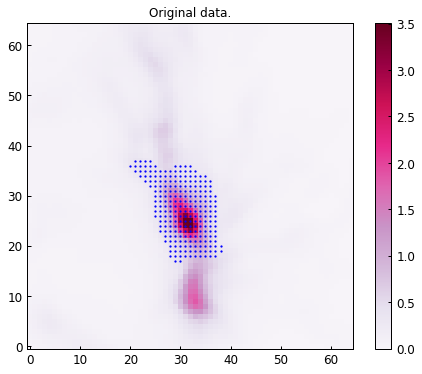

In [518]:
# 测光：select a certain area based on its color and measure the total intensity
# out0_fw
iy_ar, ix_ar = np.where(out0_fw==1)
#----------original plot--------------
fig=plt.figure(figsize=(17,6))
ax0 = fig.add_subplot(1,2,1)
im0 = ax0.imshow(map_in,origin='lower', cmap='PuRd',vmin=0,vmax=map_in.max())
ax0.scatter(ix_ar, iy_ar, c='blue', marker='.', s=6)
plt.colorbar(im0)  # nice !!!
ax0.axis('on')
plt.title("Original data.")

print('The total flux is %.3f Jy.' %np.sum(map_in[iy_ar, ix_ar]))

In [195]:
import numpy as np
#from enthought.mayavi import mlab
from mayavi import mlab
import moviepy.editor as mpy

In [196]:
import os
# os.environ['ETS_TOOLKIT'] = 'qt4'
#% gui qt

mlab.test_molecule()
mlab.show()

In [386]:
'''
mode="cube", scale_factor=0.4, 
scale_mode="none", transparent=False, vmin=0, vmax=8, colormap=clmp, opacity = 1.0)

# mode:
# ‘2darrow’, ‘2dcircle’, ‘2dcross’, ‘2ddash’, ‘2ddiamond’, 
# ‘2dhooked_arrow’, ‘2dsquare’, ‘2dthick_arrow’, ‘2dthick_cross’ 
# ‘2dtriangle’, ‘2dvertex’, ‘arrow’, ‘cone’, ‘cube’ or ‘cylinder’, ‘point’, ‘sphere’ 

# mesh: representation: ‘surface’, ‘wireframe’, ‘points’, ‘mesh’ or ‘fancymesh’ 

cmap3=
'Accent','Blues','BrBG','BuGn','BuPu','CMRmap','Dark2','GnBu','Greens','Greys',',Rd',
',anges','PRGn','Paired','Pastel1','Pastel2','PiYG','PuBu','PuBuGn','Pu,','PuRd','Purples'
'RdBu','RdGy','RdPu','RdYlBu','RdYlGn','Reds','Set1','Set2','Set3','Spectral','Vega10'
'Vega20','Vega20b','Vega20c','Wistia','YlGn','YlGnBu','Yl,Br','Yl,Rd','afmhot','autumn',
'binary','black-white','blue-red','bone','brg','bwr','cool','coolwarm','copper','cubehelix',
'file','flag','gist_earth','gist_gray','gist_heat','gist_ncar','gist_rainbow','gist_stern',
'gist_yarg','gnuplot','gnuplot2','gray','hot','hsv','inferno','jet',
'magma','nipy_spectral','ocean','pink','plasma','prism','rainbow','seismic',
'spectral','spring','summer','terrain','viridis','winter'
'''

In [198]:
# point3d example-1
x, y, z, value = np.random.random((4, 40))
mlab.points3d(x, y, z, value, mode="2dtriangle", colormap='winter')
mlab.show()

In [34]:
# point3d example-2
bgc=0.9
mlab.figure(1, fgcolor=(1, 1, 1), bgcolor=(bgc,bgc,bgc))
t = np.mgrid[-np.pi:np.pi:50j]
s=np.sin(t)+1
# 参数s是设置每个点的大小(scalar),mode可选
mlab.points3d(np.cos(t),np.sin(3*t),np.cos(5*t),s, mode='cube',line_width=1, 
              colormap='summer', scale_factor=0.3)
mlab.colorbar()
mlab.show()

In [35]:
# a point3d example-3:
def test_points3d():
    t = np.linspace(0, 4 * np.pi, 20)
    x = np.sin(2 * t)
    y = np.cos(t)
    z = np.cos(2 * t)
    s = 2 + np.sin(t)
    return mlab.points3d(x, y, z, s, colormap="copper", scale_factor=.25, )  
    # spectral, mode='cube', cylinder, sphere 

test_points3d()
mlab.show()

In [404]:
#import inspect
#inspect.getargspec(test_points3d)

ArgSpec(args=[], varargs=None, keywords=None, defaults=None)

In [40]:
# 3-D 数据可视化：点阵

x, y, z = np.mgrid[:6,:7,:8]
c = np.zeros((6, 7, 8), dtype=np.int)
c.fill(1)
k = np.random.randint(2, 5, size=(6, 7))

idx_i, idx_j, _ = np.ogrid[:6, :7, :8]
idx_k = k[:,:, np.newaxis] + np.arange(3)
c[idx_i, idx_j, idx_k] = np.random.randint(2,6, size=(6,7,3))

# clmp="viridis"
# clmp="YlGn"
clmp="jet"

# mlab.figure()
mlab.points3d(x[c>1], y[c>1], z[c>1], c[c>1], mode="cube", scale_factor=0.1, 
    transparent=False, vmin=0, vmax=4, colormap=clmp, opacity = 1.0) # +++ scale_mode="none"

mlab.points3d(x[c==1], y[c==1], z[c==1], c[c==1], mode="cube", scale_factor=0.5,
    scale_mode="none", transparent=True, vmin=0, vmax=6, colormap=clmp, opacity = 0.1)
mlab.gcf().scene.background = (1,1,1)
# mlab.show()

'''
mlab.figure() # need a new figure:
x, y, z = np.mgrid[:6,:7,:3]
mlab.points3d(x, y, z, c[idx_i, idx_j, idx_k], mode="cube", scale_factor=0.4, 
    scale_mode="none", transparent=True, vmin=0, vmax=8, colormap=clmp, opacity = 0.1)
mlab.gcf().scene.background = (1,1,1)
'''

mlab.show()

In [41]:
# plot-3d 更加连续的三维曲线分布：
# +++ recommend to add ini :
bgc=[0.98, 0.96, 0.98]
mlab.figure(1, fgcolor=(1, 1, 1), bgcolor=(bgc[0],bgc[1],bgc[2]))
mlab.clf()  # Clear the figure
# ----------------------
t = np.linspace(0, 20, 200)
mlab.plot3d(np.sin(t), np.cos(t), 0.1*t, t, colormap='rainbow')  # +++ mode='sphere'  colormap='rainbow' 
mlab.show()

In [42]:
# barchart example-1:
s = np.random.rand(3,3)
mlab.barchart(s)
mlab.vectorbar()
mlab.show()

In [43]:
# barchart example-2
x,y = np.mgrid[-5:5:20j,-5:5:20j]
s = 10 * np.exp(-(x**2 + y**2)/2)   #peaks函数前面已经定义
mlab.barchart(x,y,s)
mlab.vectorbar()
mlab.show()

In [536]:
# surf-1:
x, y = np.mgrid[-10:10:100j, -10:10:100j]
r = np.sqrt(x**2 + y**2)
z = np.sin(r)/r
mlab.surf(z, warp_scale=20)  # 'auto'
mlab.show()

In [46]:
# surf-1 : 调整图像透明度：
import numpy as np

x, y = np.mgrid[-10:10:200j, -10:10:200j]
z = 100 * np.sin(x * y) / (x * y)

# Visualize it with mlab.surf
from mayavi import mlab
mlab.figure(bgcolor=(1, 1, 1))
surf = mlab.surf(z, colormap='cool')  # opacity=0.5 colormap='cool' opacity=0.5

# 透明度渐变数组
# The lut is a 255x4 array, with the columns representing RGBA
# (red, green, blue, alpha) coded with integers going from 0 to 255.

lut = surf.module_manager.scalar_lut_manager.lut.table.to_array()
lut[:, -1] = np.linspace(0, 256, 256)
surf.module_manager.scalar_lut_manager.lut.table = lut
mlab.draw()


# We need to force update of the figure now that we have changed the LUT.

mlab.view(40, 85)
mlab.show()

In [365]:
np.shape(lut)

(256, 4)

In [47]:
# mesh : 比 surf 更为复杂的曲面： 
mlab.clf()
phi, theta = np.mgrid[0:np.pi:11j, 0:2*np.pi:11j]
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)
mlab.mesh(x, y, z)
mlab.mesh(x, y, z, representation='wireframe', color=(0, 0, 0))
mlab.show()

In [48]:
# 三维多层曲面：contour3d:
cube = np.zeros((100,100,100))
cube[:,:,:] = np.linspace(0, 1, np.prod(cube.shape)).reshape(cube.shape).T
mlab.contour3d(cube, colormap="jet", opacity=1, contours=9)
mlab.show()

In [52]:
x, y, z = np.mgrid[-20:20:100j, -20:20:100j, -20:20:100j]
values = x*x*0.5 + y*y + z*z*2.0
mlab.figure(bgcolor=(1, 1, 1))
mlab.contour3d(values, opacity=0.2, colormap="jet")
mlab.show()

In [2]:
# 3-D 数据可视化：动态图片
import numpy as np
#from enthought.mayavi import mlab
from mayavi import mlab
import moviepy.editor as mpy

x, y, z = np.mgrid[:6,:7,:8]
c = np.zeros((6, 7, 8), dtype=np.int)
c.fill(1)
k = np.random.randint(2, 5, size=(6, 7))

idx_i, idx_j, _ = np.ogrid[:6, :7, :8]
idx_k = k[:,:, np.newaxis] + np.arange(3)
c[idx_i, idx_j, idx_k] = np.random.randint(2,6, size=(6,7,3))

# clmp="viridis"
# clmp="YlGn"
clmp="rainbow"
mlab.figure(bgcolor=(1, 1, 1))
mlab.points3d(x[c>1], y[c>1], z[c>1], c[c>1], mode="cube", scale_factor=0.6,
        scale_mode="none", transparent=False, vmin=0, vmax=8, colormap=clmp, opacity=1.0)
mlab.points3d(x[c==1], y[c==1], z[c==1], c[c==1], mode="cube", scale_factor=0.5,
        scale_mode="none", transparent=True, vmin=0, vmax=8, colormap=clmp, opacity = 0.1)
mlab.gcf().scene.background = (0,0,0)
# mlab.show()

duration=10  # total time for the movement.

def make_frame(t):
    # mlab.clf()
    f = mlab.gcf()
    f.scene._lift()
    mlab.view(azimuth= 180*t/duration, distance=20) # camera angle
    return mlab.screenshot(antialiased=True)

# duration是gif时长
animation = mpy.VideoClip(make_frame, duration=duration)
# fps帧率
animation.write_gif('rot2.gif', fps=3)

t:  10%|█         | 3/30 [00:00<00:01, 20.55it/s, now=None]

MoviePy - Building file rot2.gif with imageio.


In [7]:
# 3-D 数据可视化：动态图片
import numpy as np
#from enthought.mayavi import mlab
from mayavi import mlab
import moviepy.editor as mpy

mlab.test_molecule()
mlab.view(azimuth= 180, elevation=80, distance=200)
mlab.show()

In [11]:
# 3-D 数据可视化：动态图片
import numpy as np
#from enthought.mayavi import mlab
from mayavi import mlab
import moviepy.editor as mpy

duration = 3  # total time for the movement.
mlab.figure(bgcolor=(1, 1, 1))
mlab.test_molecule()
mlab.gcf().scene.background = (1,1,1)

def make_frame(t):
    # mlab.clf()
    f = mlab.gcf()
    f.scene._lift()
    mlab.view(azimuth= 180*t/duration, distance=200) # camera angle
    return mlab.screenshot(antialiased=True)

# duration是gif时长
animation = mpy.VideoClip(make_frame, elevation=30, duration=duration)
# fps帧率
animation.write_gif('mol_rot.gif', fps=30)

NameError: name 't' is not defined

In [53]:
# 3-D 数据可视化：三维等高面。
# scu2b_rg2 = sc.read('./scu2b_rg2.fits',hdu=0)

# ------------------------ channel map --------------------------
Tb_cube = scu2b_rg2.hdu.data  # extract the data matrix
max0 = np.max(Tb_cube)
print(np.shape(Tb_cube), max0)

(150, 109, 70) 29.090428786211206


In [57]:
# 三维等高面：
bgc=0.97
mlab.figure(1, fgcolor=(0,0,0), bgcolor=(bgc+0.01,bgc,bgc))
src = mlab.pipeline.scalar_field(Tb_cube/max0)
contour = mlab.pipeline.contour(src)
contour.filter.contours=[0.1, 0.3, 0.5, 0.7, 0.9]
mlab.pipeline.surface(contour, colormap='cool', opacity=0.4)
#mlab.outline()
mlab.axes(contour,xlabel='frequency',ylabel='ra',zlabel='dec')
mlab.show()

In [257]:
nv, ny, nx = np.shape(Tb_cube)
print(nv, ny, nx)
print(len(sp_v))

150 109 70
150


In [58]:
# 更复杂的等高面，颜色表示多普勒速度 color indicate velocity....
# sp_v = scu1.spectral_axis.value 
nv, ny, nx = np.shape(Tb_cube)
v_cube = np.zeros((nv, ny, nx))

for i in np.arange(nv):
    v_cube[i, :, :] = sp_v[i]

In [59]:
# 更复杂的等高面，颜色表示多普勒速度:
bgc=0.95
Tb_int = np.sum(Tb_cube,axis=0)
mlab.figure(1, fgcolor=(0, 0, 0), bgcolor=(bgc,bgc+0.02,bgc))

src = mlab.pipeline.scalar_field(Tb_cube/max0)
# velocity as the color scale:
src.image_data.point_data.add_array(v_cube.T.ravel())
src.image_data.point_data.get_array(1).name = 'vsys'
# Make sure that the dataset is up to date with the different arrays:
src.update()
# We select the 'scalar' attribute, ie the norm of v_cube
src2 = mlab.pipeline.set_active_attribute(src, point_scalars='scalar')


# ------contour surface-------
contour = mlab.pipeline.contour(src2)
contour.filter.contours=[0.1, 0.3, 0.5, 0.7, 0.9]
contour2 = mlab.pipeline.set_active_attribute(contour,point_scalars='vsys')
mlab.pipeline.surface(contour2, colormap='rainbow', opacity=0.5, extent=[0,nv,0,ny,0,nx])
# extent = [0,nx/2,0,nx,0,ny]
# extent = [0,1,0,3,0,4]
# extent = [9.1,12,0,199,0,206]
mlab.colorbar(title='Vsys', orientation='vertical', nb_labels=3)
mlab.axes(contour2, xlabel='Vsys', ylabel='Ra', zlabel='Dec')
mlab.outline(extent=[0,nv,0,ny,0,nx])  #boxs
# mlab.surf(Tb_int)
#mlab.contour_surf(xm[0,:],ym[:,0],np.transpose(Tb_int,(1,0)),
#                  contours=[0.3,0.8,1.3,1.8],color=(0,0,0),warp_scale=0)

mlab.contour_surf(Tb_int/Tb_int.max(), contours=[0.3,0.5,0.7,0.9],color=(0,0,0),warp_scale=0)
#ranges = [0,100,0,200,0,200]
#mlab.gcf().scene.background = (0.6, 0.6, 0.9)
mlab.show()

In [519]:
# -------------------- SED fitting --------------------------
from reproject import reproject_interp 
from spectral_cube import SpectralCube as sc

hdu_sp250b = fits.open('./sp250_omc3.fits')[0]
hdu350 = fits.open('./sp350_omc3.fits')[0]
hdu500 = fits.open('./sp500_omc3.fits')[0]
hdu160 = fits.open('./pacs160_omc3.fits')[0]

# original unit is Jy/pixel or Jy/beam, 
# thus should divide pixel or beam areas to convert the intensity unit to Jy/arcsec^2:
A160 = 6.4**2; A250 = np.pi/4*(18**2); A350 = np.pi/4*(25**2); A500 = np.pi/4*(36**2)  

im_sp250 = hdu_sp250b.data
im_sp250 = np.nan_to_num(im_sp250)/A250
# wcs as a gauge to reproject all the figures to same shape array
w1 = wcs.WCS(hdu_sp250b.header) 
ny,nx = np.shape(im_sp250)

_data, _fp = reproject_interp(hdu350, output_projection=w1, shape_out=(ny,nx) )
im_sp350 = np.nan_to_num(_data)/A350

_data, _fp = reproject_interp(hdu500, output_projection=w1, shape_out=(ny,nx) )
im_sp500 = np.nan_to_num(_data)/A500

_data, _fp = reproject_interp(hdu160, output_projection=w1, shape_out=(ny,nx) )
im_pa160 = np.nan_to_num(_data)/A160

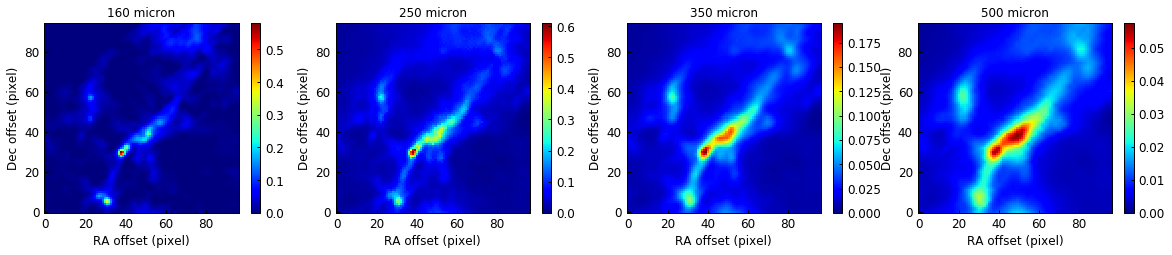

In [520]:
#---------- original plot --------------
from matplotlib import rc

fig=plt.figure(figsize=(20,3.5))
ax0 = fig.add_subplot(1,4,1)
im0 = ax0.imshow(im_pa160,origin='lower', cmap='jet',vmin=0,vmax=im_pa160.max())
plt.colorbar(im0)
ax0.set_xlabel('RA offset (pixel)')
ax0.set_ylabel('Dec offset (pixel)')
plt.title("160 micron")

ax0 = fig.add_subplot(1,4,2)
im0 = ax0.imshow(im_sp250,origin='lower', cmap='jet',vmin=0,vmax=im_sp250.max())
plt.colorbar(im0)
ax0.set_xlabel('RA offset (pixel)')
ax0.set_ylabel('Dec offset (pixel)')
plt.title("250 micron")

ax0 = fig.add_subplot(1,4,3)
im0 = ax0.imshow(im_sp350,origin='lower', cmap='jet',vmin=0,vmax=im_sp350.max())
ax0.set_xlabel('RA offset (pixel)')
ax0.set_ylabel('Dec offset (pixel)')
ax0.set_title("350 micron")
plt.colorbar(im0)

ax0 = fig.add_subplot(1,4,4)
im0 = ax0.imshow(im_sp500,origin='lower', cmap='jet',vmin=0,vmax=im_sp500.max())
ax0.set_xlabel('RA offset (pixel)')
ax0.set_ylabel('Dec offset (pixel)')
ax0.set_title("500 micron")
plt.colorbar(im0)

In [521]:
from lmfit import minimize, Parameters, Model
from astropy.table import Column, Table
from lmfit import minimize, Parameters, Model
from astropy import wcs
from astropy import constants as cons
from astropy import units as u

# ----------------- physical Constants --------------------
h = cons.h.cgs.value   # Planck constant in CGS unit
k_B = cons.k_B.cgs.value # Boltzmann constant in CGS unit
c = cons.c.cgs.value # speed of light in CGS unit
mH = cons.m_n.cgs.value # mass of an neutron
muh2 = 2.33 # mean molecular weight adopted from Kauffmann et al. (2008)
r_gd = 100.0 # gas-to-dust mass ratio
f0 = 599.584916e9 # Reference frequency in Hz.
kappa0 = 5.0 # Dust emissivity at reference frequency
# ---------------- source distance -----------------
dis = 0.65*u.kpc
d_cgs  = dis.cgs.value

# ----------------- initial condition for the fit ------------------
iMass  = 2 * u.Msun
iTdust = 15.0 * u.K
ibeta  = 1.2     # no unit
betaVary = False # If True, Beta will be fitted.
                 # If False, beta will be fixed.
betaMin = 1.0
betaMax = 2.0

# ------------------ model function --------------------
def greybody(freq, mass=iMass.cgs.value, Tdust=iTdust.cgs.value, beta=ibeta):
    blackBody = 2 * h * freq**3 / c**2 / (np.exp(h*freq/k_B/Tdust)-1)
    tau = mass*kappa0*(freq/f0)**beta/d_cgs**2/r_gd
    return blackBody*tau

In [522]:
wavelengths = np.array([160,250,350,500]) * u.um
freq_v = wavelengths.to(u.Hz, u.spectral()).value.copy()
ny,nx = np.shape(im_sp250)
im_Td = np.zeros((ny,nx))

# inspect the im_sp250 image to select the reasonable value, recommended: 30% of the peak. 
thd = 0.08 

for iy in np.arange(ny):
    for ix in np.arange(nx):
        if im_sp250[iy,ix] > thd: # ignore the weak pixels based on 250 micron image
            # data array: 
            fluxData = np.array([im_pa160[iy,ix], im_sp250[iy,ix], \
                                 im_sp350[iy,ix], im_sp500[iy,ix]]) * u.Jy
            # ----------------- optimize --------------------
            # model object, to list its available functions, use command dir(gMod).
            gMod = Model(greybody) 
            # beta range to be fit, betaVary=0 to let beta=constant
            gMod.set_param_hint('beta', min = betaMin, max = betaMax, vary = betaVary)
            # upper limit for reasonable Tdust:
            gMod.set_param_hint('Tdust', max = 80.0)
            # initial value of Mass and Tdust usual several Msun and 20-50 K for cold ISM. 
            pars = gMod.make_params(mass = iMass.cgs.value, Tdust = iTdust.cgs.value)
            sedResult = gMod.fit(fluxData.cgs.value, freq = freq_v)
            im_Td[iy,ix] = sedResult.params['Tdust'].value


#----------------- single point --------------
iy,ix = 39,50
fluxData = np.array([im_pa160[iy,ix], im_sp250[iy,ix], \
                     im_sp350[iy,ix], im_sp500[iy,ix]]) * u.Jy
gMod = Model(greybody)
gMod.set_param_hint('beta', min = betaMin, max = betaMax, vary = betaVary)
gMod.set_param_hint('Tdust', max = 80.0)
pars = gMod.make_params(mass = iMass.cgs.value, Tdust = iTdust.cgs.value)
sedResult = gMod.fit(fluxData.cgs.value, freq = freq_v)

# ---------------- print the fitting result: -----------------------
x = np.array(np.logspace(0.8, 3.0, 300))*u.um
xFreq = x.to(u.Hz, u.spectral()).value.copy()
y = greybody(xFreq,Tdust = sedResult.params['Tdust'].value,
             mass = sedResult.params['mass'].value) * u.g/u.s**2

print('mass= ', sedResult.params['mass'].value/Msun,' Msun')
print('Tdust= ', sedResult.params['Tdust'].value, ' K')
print('beta= ', sedResult.params['beta'].value)

mass=  0.06404504560523996  Msun
Tdust=  16.213302960233847  K
beta=  1.2


(0.01, 1)

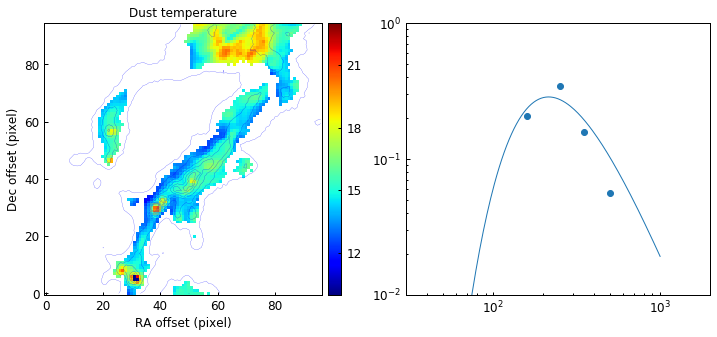

In [523]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

# im_Td_mask = np.ma.masked_where(im_sp250 < thd, im_Td)
# im_Td2 = im_Td_mask

fig=plt.figure(figsize=(12,5))
ax0 = fig.add_subplot(1,2,1)
im0 = ax0.imshow(im_Td2,origin='lower', cmap='jet',vmin=10, vmax=23)
lvs = np.arange(0.1,1,0.1)*im_sp250.max()*0.9
ax0.contour(im_sp250,levels=lvs,colors='blue',linewidths=0.2)
ax0.set_xlabel('RA offset (pixel)')
ax0.set_ylabel('Dec offset (pixel)')
plt.title("Dust temperature")

ax0_divider = make_axes_locatable(ax0)
cax0 = ax0_divider.append_axes("right", size="5%", pad="2%")
cb0 = colorbar(im0, cax=cax0, orientation="vertical")
cax0.xaxis.set_ticks_position("top")

ax = fig.add_subplot(1,2,2)
ax.plot(x,y.to(u.Jy).value)
ax.scatter(wavelengths, fluxData)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(30, 2000)
ax.set_ylim(1e-2, 1)

In [ ]:
# excise: T_dust histogram

In [466]:
# ------------------------- filament structures analysis -------------------
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import scipy

from spectral_cube import Projection
from fil_finder import FilFinder2D
from astropy.io import fits
import seaborn as sb
import matplotlib as mpl

hdu = fits.open('filaments_updatedhdr.fits')[0]
# also select the effective pixels with strong emissions, based on the image:
mask = hdu.data > 1.0  
# filfinder object to manipulate.
fil = FilFinder2D(hdu, distance=250 * u.pc, beamwidth=10 * u.arcsec, \
                  ang_scale=0.1 * u.deg,  mask=mask, save_name="FilFinder_Output")

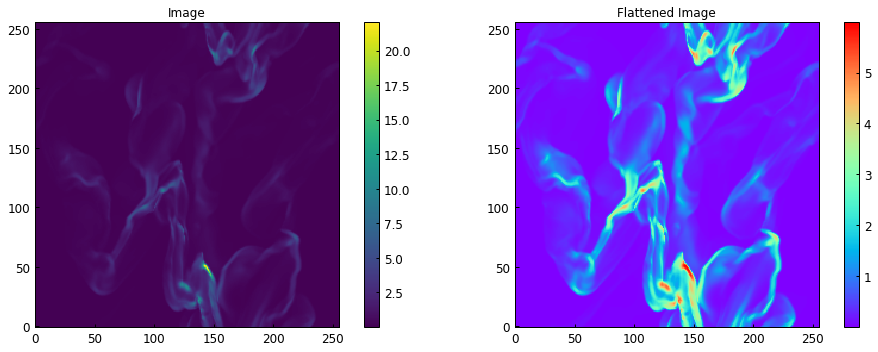

In [524]:
# 预处理：动态范围调整

fil.preprocess_image(flatten_percent=99) # flatten_percent 饱和度参数
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.imshow(fil.image.value, origin='lower')
plt.title("Image")
plt.colorbar()

plt.subplot(122)
plt.imshow(fil.flat_img.value, origin='lower', cmap='rainbow')
plt.title("Flattened Image")
plt.tight_layout()
plt.colorbar()

In [525]:
# ------------------------- filament structures analysis -------------------
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import scipy

from spectral_cube import Projection
from fil_finder import FilFinder2D
from astropy.io import fits
import seaborn as sb
import matplotlib as mpl

hdu1 = fits.open('filaments_updatedhdr.fits')[0]

mask = hdu1.data > 50.0
fil = FilFinder2D(hdu1, distance=240 * u.pc, beamwidth=10 * u.arcsec, \
                  ang_scale=0.1 * u.deg,  mask=mask, save_name="filfinder1")
fil.preprocess_image(flatten_percent=90)

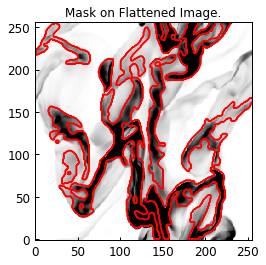

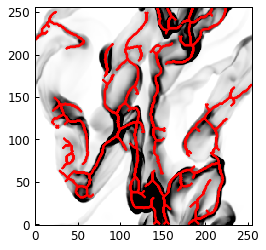

In [526]:
fil.create_mask(verbose=True, border_masking=False, \
                size_thresh=400 * u.pix**2, glob_thresh=0.2)
fil.medskel(verbose=True)  # reduce the filament web.
fil.analyze_skeletons(branch_thresh=20 * u.pix, prune_criteria='length')

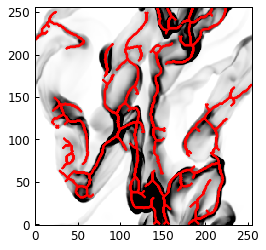

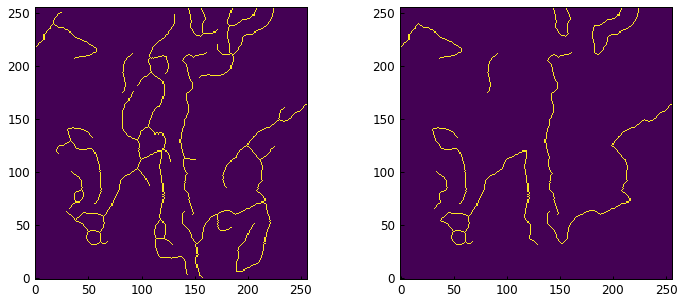

In [527]:
fil.medskel(verbose=True)  # repeat as to fresh the skeleton

fig = plt.figure(figsize=(12,5))
ax0=fig.add_subplot(1,2,1)

# filament measurement for the subsequent parameters lengths, intensities, etc.:
fil.analyze_skeletons(branch_thresh=10 * u.pix, prune_criteria='length') 
ax0.imshow(fil.skeleton, origin='lower')

ax1=fig.add_subplot(1,2,2)
fil.analyze_skeletons(branch_thresh=200 * u.pix, prune_criteria='length') # change branch_thresh=10-2000 to see the effect.
ax1.imshow(fil.skeleton, origin='lower')

In [ ]:
fil.lengths()  # total continued paths

In [ ]:
# small branches
fil.branch_properties.keys()

In [ ]:
fil.branch_properties['number']

In [ ]:
fil.branch_properties['length'][4]

In [ ]:
# execise: intensity map along the filaments, histogram.

[Text(0,0,'270'),
 Text(0,0,'315'),
 Text(0,0,'0'),
 Text(0,0,'45'),
 Text(0,0,'90'),
 Text(0,0,'135'),
 Text(0,0,'180'),
 Text(0,0,'225')]

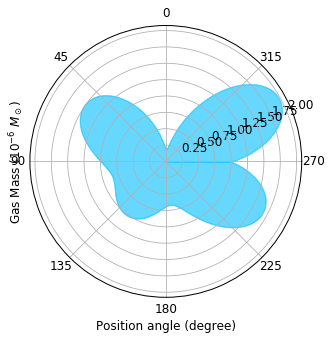

In [528]:
pa_arr = np.arange(0, 2*np.pi, 0.01)
rad_arr = np.sin(pa_arr*3) * np.cos(pa_arr*0.4)

# rc("font", family="serif", size=7)

fig = plt.figure(figsize=(5, 5))
# base=np.mean(flow_v3_r)
ax0 = fig.add_subplot(1,1,1, projection='polar')
ax0.fill_between(pa_arr, rad_arr+1, color='deepskyblue', alpha=0.6, step='pre')
# ax0.plot(pa_v0+np.pi/2, flow_v3_b+base, '-', c='red', ms=2, lw=1, drawstyle='steps')
ax0.set_xlabel('Position angle (degree)')
ax0.set_ylabel('Gas Mass ($10^{-6}\ M_\odot$)')
# ax0.legend(['other clumps','streams'])
ax0.grid(True)
xts = np.mod(np.array([0,45,90,135,180,225,270,315]).astype(int)-90,360)
ax0.set_xticklabels(xts)
#ax0.set_yticklabels([])

In [ ]:
import pandas as pd
df = pd.read_excel('orion_short2.xlsx', sheet_name='Sheet1') 


In [164]:
# FFT 变换与滤波
# artifical signal:
def gau_fc(t_arr, c0, t0, dt):
    gau0_arr = c0 * np.exp(-(t_arr - t0) ** 2 / (2 * dt ** 2))
    return gau0_arr
    
# sampling period:
t_arr = np.arange(-3, 3, 0.03)

# noise:
c0, t0, dt = 2, 0.3, 1.2
f_noise = np.array([4, 5])
noise0_arr = 0.3 * c0 * np.sin(t_arr * 2 * np.pi * f_noise[0])
noise1_arr = 0.5 * c0 * np.sin(t_arr * 2 * np.pi * f_noise[1])

signal0_arr = gau_fc(t_arr, c0, t0, dt)
signal_arr = signal0_arr + noise0_arr + noise1_arr

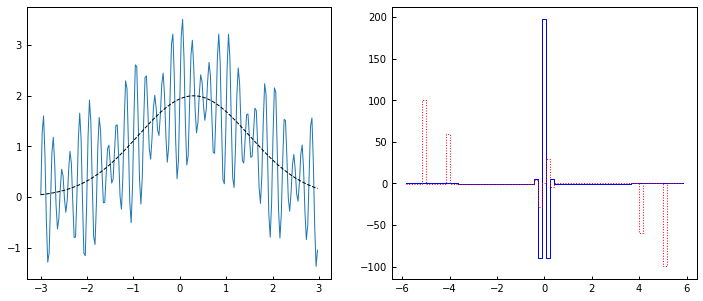

In [165]:
# +++ cos, 相位变到虚部。

sample_interval = np.mean(t_arr[1:] - t_arr[0:-1])
sample_freq = 1./sample_interval
n_sig = len(signal_arr)

y_ft = np.fft.fft(signal_arr)
y_fts = np.fft.fftshift(y_ft)   

# ---------- Nyquist Priciple ----------------
f1 = 0.5 + 1/n_sig
freq_arr = np.linspace(-f1, f1, n_sig) * sample_freq  # fft frequency axis
#---------------------------------------------

i_df = np.where(np.abs(freq_arr)<6)[0]


fig = plt.figure(figsize=(12,5))

ax0 = fig.add_subplot(1, 2, 1)
ax0.plot(t_arr, signal_arr)
ax0.plot(t_arr, signal0_arr, 'k--')

ax0 = fig.add_subplot(1, 2, 2)
ax0.plot(freq_arr[i_df], np.fft.fftshift(y_ft.real)[i_df], 'b-', drawstyle='steps')
ax0.plot(freq_arr[i_df], np.fft.fftshift(y_ft.imag)[i_df], 'r:', drawstyle='steps')
plt.show()

In [168]:
# ++++ filter width affect the output
def filter_fc(freq_arr, y_ft, f_c, df):
    ix_arr = np.where(np.abs(np.abs(freq_arr)-f_c)<=df)[0]
    y_flt = np.fft.fftshift(y_ft)
    y_flt[ix_arr] = (y_ft[ix_arr[0]-1] + y_ft[ix_arr[-1]+1])/2
    # y_flt[ix_arr] = 0
    return np.fft.fftshift(y_flt)

y_flt0 = filter_fc(freq_arr, y_ft, 4, 0.8)
# y_flt1 = filter_fc(freq_arr, y_flt0, 5, 0.8)
y_flt1 = y_flt0

y_ifft = np.fft.ifft(y_flt1, n=len(t_arr))

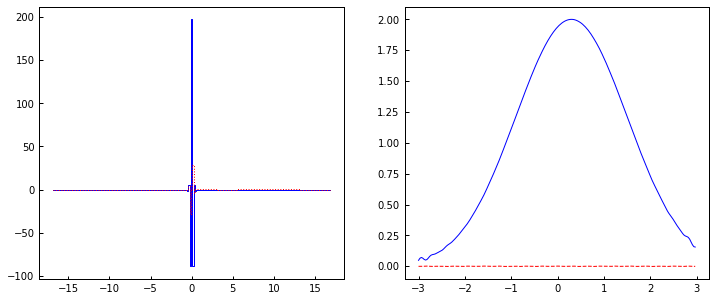

In [169]:
fig = plt.figure(figsize=(12,5))

ax0 = fig.add_subplot(1, 2, 1)
ax0.plot(freq_arr, np.fft.fftshift(y_flt1.real), 'b-', drawstyle='steps')
ax0.plot(freq_arr, np.fft.fftshift(y_flt1.imag), 'r:', drawstyle='steps')

ax0 = fig.add_subplot(1, 2, 2)
ax0.plot(t_arr, y_ifft.real, 'b-')
ax0.plot(t_arr, y_ifft.imag, 'r--')
plt.show()

In [75]:
# Excel data operation ..............
import pandas as pd
file_name = 'orion_short2.xlsx'
df = pd.read_excel('orion_short2.xlsx', sheet_name='Sheet1') 

In [76]:
df.head(10)   # (num)

ra_arr   dec_arr  prlx_arr  pmra_arr  pmdec_arr    dist_arr      xp_arr  \
0  83.759944 -5.263316  2.547766  0.604209   0.144789  392.465729  225.085775   
1  84.182352 -6.068806  2.567213  3.475755  -3.644911  389.492620  -26.778935   
2  83.859791 -5.427832  2.437571  0.124194   2.175363  410.207780  165.486795   
3  83.912829 -5.148996  2.544489  2.653290  -0.231377  392.971176  133.691116   
4  83.874315 -5.548193  2.590282  1.760484   0.738185  386.023899  156.855301   
5  83.797909 -5.434002  2.415596  1.658990  -1.309354  413.939518  202.453163   
6  83.802506 -5.395592  2.489562  2.565866  -1.360956  401.641227  199.695432   
7  83.736756 -5.192504  2.662493  0.206659   1.273879  375.554297  238.922649   
8  83.880406 -5.259163  2.656713  2.463806   1.134952  376.371407  153.108742   
9  83.405211 -5.447992  2.477052 -0.323317  -0.474394  403.669639  437.016993   

       yp_arr  fil_dist_2d  fil_dist_3d  yso  
0  443.021375     0.001009     7.465729    1  
1  -40.556657     2.551699     5.166702    0  
2  344.276415     0.063840    25.207861    1  
3  511.563177     0.178945     7.973184    0  
4  272.049773     0.360905     1.085643    1  
5  340.595697     0.114761    28.939745    1  
6  363.641191     0.009142    16.641230    1  
7  485.515145     0.246639     9.448923    1  
8  445.473635     0.148457     8.629870    1  
9  332.248809     0.650106    18.680954    0

In [65]:
pwd

'/Users/rzy/data/jupyter/astro_data'

In [ ]:
# column selection
cols = [1, 2, 3]

df = pd.read_excel('MLBPlayerSalaries.xlsx', sheet_names='Sheet1', usecols=cols)
df.head()

In [77]:
# ++++ add column:
# print(np.shape(ra_arr))
# np.dtype(ra_arr[0])
ra_arr = df['ra_arr'].values
dec_arr = df['dec_arr'].values
offset_arr = df['ra_arr'].values - 83.912829
# add a new column:
df['offset'] = offset_arr

In [78]:
df.head()

ra_arr   dec_arr  prlx_arr  pmra_arr  pmdec_arr    dist_arr      xp_arr  \
0  83.759944 -5.263316  2.547766  0.604209   0.144789  392.465729  225.085775   
1  84.182352 -6.068806  2.567213  3.475755  -3.644911  389.492620  -26.778935   
2  83.859791 -5.427832  2.437571  0.124194   2.175363  410.207780  165.486795   
3  83.912829 -5.148996  2.544489  2.653290  -0.231377  392.971176  133.691116   
4  83.874315 -5.548193  2.590282  1.760484   0.738185  386.023899  156.855301   

       yp_arr  fil_dist_2d  fil_dist_3d  yso        offset  
0  443.021375     0.001009     7.465729    1 -1.528853e-01  
1  -40.556657     2.551699     5.166702    0  2.695226e-01  
2  344.276415     0.063840    25.207861    1 -5.303827e-02  
3  511.563177     0.178945     7.973184    0 -1.131166e-07  
4  272.049773     0.360905     1.085643    1 -3.851376e-02

In [ ]:
# save to excel
df.to_excel(file_name) 
# be careful not to overwrite the exisiting data !!!!!!!!!

In [245]:
# self define data structure: 
df1 = pd.DataFrame({'a': np.random.randn(10),
                   'b': np.random.randn(10),
                   'N': np.random.randint(100, 300, (10)),
                   'x': 'x'})

In [247]:
df1.head(10)

N         a         b  x
0  136 -0.409278  1.387441  x
1  200  1.869651 -0.775849  x
2  196  1.608118 -0.414093  x
3  291  0.177029 -0.351606  x
4  263  1.021363  0.736731  x
5  213 -1.482572 -0.829534  x
6  150  0.228361 -1.038674  x
7  257  0.934885  2.635286  x
8  146 -0.063724 -1.072476  x
9  152 -0.262665 -0.351068  x

In [194]:
writer_orig = pd.ExcelWriter('orion_short3.xlsx', engine='xlsxwriter')
df1 = pd.DataFrame({'ra_copy':ra_arr, 'dec_arr':dec_arr})
df1.to_excel(writer_orig, sheet_name='Sheet2', index=False)
writer_orig.save()

In [80]:
# coordinate transform..........
excel_file = 'movies.xls'
movies = pd.read_excel(excel_file)

In [ ]:
dir(movies_sheet1)

In [ ]:
# movies_sheet1 = pd.read_excel(excel_file, sheetname=0, index_col=4)  # index_col: reference column
# movies_sheet1.head(15)
# movies_sheet1.columns
# movies_sheet1.rolling
movies_sheet1.sample

In [81]:
xlsx = pd.ExcelFile(excel_file)
movies_sheets = []
for sheet in xlsx.sheet_names:
    movies_sheets.append(xlsx.parse(sheet))
    movies = pd.concat(movies_sheets)

In [82]:
movies.shape
movies.tail()

Title  Year  \
1599              War & Peace                NaN   
1600                    Wings                NaN   
1601               Wolf Creek                NaN   
1602        Wuthering Heights                NaN   
1603  Yu-Gi-Oh! Duel Monsters                NaN   

                                         Genres  Language    Country  \
1599                  Drama|History|Romance|War   English         UK   
1600                               Comedy|Drama   English        USA   
1601                      Drama|Horror|Thriller   English  Australia   
1602                              Drama|Romance   English         UK   
1603  Action|Adventure|Animation|Family|Fantasy  Japanese      Japan   

     Content Rating  Duration  Aspect Ratio  Budget  Gross Earnings  \
1599          TV-14       NaN         16.00     NaN             NaN   
1600            NaN      30.0          1.33     NaN             NaN   
1601            NaN       NaN          2.00     NaN             NaN   
1602            NaN     142.0           NaN     NaN             NaN   
1603            NaN      24.0           NaN     NaN             NaN   

         ...     Facebook Likes - Actor 1 Facebook Likes - Actor 2  \
1599     ...                       1000.0                    888.0   
1600     ...                        685.0                    511.0   
1601     ...                        511.0                    457.0   
1602     ...                      27000.0                    698.0   
1603     ...                          0.0                      NaN   

     Facebook Likes - Actor 3 Facebook Likes - cast Total  \
1599                    502.0                        4528   
1600                    424.0                        1884   
1601                    206.0                        1617   
1602                    427.0                       29196   
1603                      NaN                           0   

      Facebook likes - Movie  Facenumber in posters  User Votes  \
1599                   11000                    1.0        9277   
1600                    1000                    5.0        7646   
1601                     954                    0.0         726   
1602                       0                    2.0        6053   
1603                     124                    0.0       12417   

      Reviews by Users  Reviews by Crtiics  IMDB Score  
1599              44.0                10.0         8.2  
1600              56.0                19.0         7.3  
1601               6.0                 2.0         7.1  
1602              33.0                 9.0         7.7  
1603              51.0                 6.0         7.0  

[5 rows x 25 columns]

In Excel, you’re able to sort a sheet based on the values in one or more columns. In pandas, you can do the same thing with the sort_values method. For example, let’s sort our movies DataFrame based on the Gross Earnings column.

In [84]:
sorted_by_gross = movies.sort_values(['Gross Earnings'], ascending=False)

In [85]:
# sorted_by_gross["Gross Earnings"].head(10)
sorted_by_gross[["Title", "Gross Earnings"]].head(10)

Title  Gross Earnings
1867                                     Avatar      760505847.0
1027                                    Titanic      658672302.0
1263                             Jurassic World      652177271.0
610                                The Avengers      623279547.0
611                                The Avengers      623279547.0
1774                            The Dark Knight      533316061.0
1281  Star Wars: Episode I - The Phantom Menace      474544677.0
226          Star Wars: Episode IV - A New Hope      460935665.0
1183                    Avengers: Age of Ultron      458991599.0
618                       The Dark Knight Rises      448130642.0

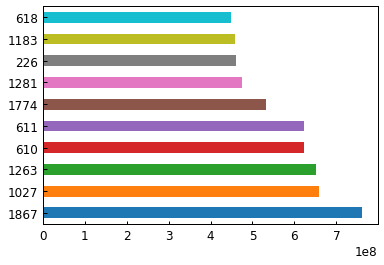

In [86]:
sorted_by_gross['Gross Earnings'].head(10).plot(kind="barh")
plt.show()

In [88]:
movies['IMDB Score'].plot(kind="hist", df)
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-88-55d13cd3e70a>, line 1)

Text(0.5,1,'statistics')

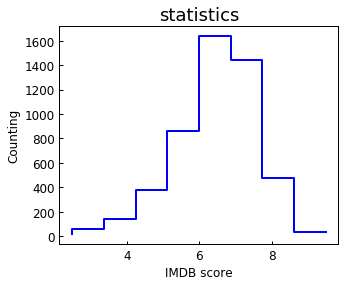

In [91]:
# more delecate statistics: adjusting the bins:
par_arr = movies['IMDB Score']
#print(type(par_arr), np.dtype(par_arr.))

# 统计区间：
b1 = np.linspace(par_arr.min(), par_arr.max(), 10)
dz = b1[1] - b1[0]
b2 = b1[0:-1] + dz
hs_arr, _tp = np.histogram(par_arr, bins=b1)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(b2, hs_arr, c='blue', drawstyle='steps', linewidth=2)
ax.set_xlabel('IMDB score')
ax.set_ylabel('Counting')
ax.set_title('statistics')
# plt.savefig('Td_compare_omc.pdf',fmt='pdf')

In [224]:
# basic statistical properties:
movies.describe()

Year     Duration  Aspect Ratio        Budget  Gross Earnings  \
count  4935.000000  5028.000000   4714.000000  4.551000e+03    4.159000e+03   
mean   2002.470517   107.201074      2.220403  3.975262e+07    4.846841e+07   
std      12.474599    25.197441      1.385113  2.061149e+08    6.845299e+07   
min    1916.000000     7.000000      1.180000  2.180000e+02    1.620000e+02   
25%    1999.000000    93.000000      1.850000  6.000000e+06    5.340988e+06   
50%    2005.000000   103.000000      2.350000  2.000000e+07    2.551750e+07   
75%    2011.000000   118.000000      2.350000  4.500000e+07    6.230944e+07   
max    2016.000000   511.000000     16.000000  1.221550e+10    7.605058e+08   

       Facebook Likes - Director  Facebook Likes - Actor 1  \
count                4938.000000               5035.000000   
mean                  686.621709               6561.323932   
std                  2813.602405              15021.977635   
min                     0.000000                  0.000000   
25%                     7.000000                614.500000   
50%                    49.000000                988.000000   
75%                   194.750000              11000.000000   
max                 23000.000000             640000.000000   

       Facebook Likes - Actor 2  Facebook Likes - Actor 3  \
count               5029.000000               5020.000000   
mean                1652.080533                645.009761   
std                 4042.774685               1665.041728   
min                    0.000000                  0.000000   
25%                  281.000000                133.000000   
50%                  595.000000                371.500000   
75%                  918.000000                636.000000   
max               137000.000000              23000.000000   

       Facebook Likes - cast Total  Facebook likes - Movie  \
count                  5042.000000             5042.000000   
mean                   9700.959143             7527.457160   
std                   18165.101925            19322.070537   
min                       0.000000                0.000000   
25%                    1411.250000                0.000000   
50%                    3091.000000              166.000000   
75%                   13758.750000             3000.000000   
max                  656730.000000           349000.000000   

       Facenumber in posters    User Votes  Reviews by Users  \
count            5029.000000  5.042000e+03       5022.000000   
mean                1.371446  8.368475e+04        272.770808   
std                 2.013683  1.384940e+05        377.982886   
min                 0.000000  5.000000e+00          1.000000   
25%                 0.000000  8.599250e+03         65.000000   
50%                 1.000000  3.437100e+04        156.000000   
75%                 2.000000  9.634700e+04        326.000000   
max                43.000000  1.689764e+06       5060.000000   

       Reviews by Crtiics   IMDB Score  
count         4993.000000  5042.000000  
mean           140.194272     6.442007  
std            121.601675     1.125189  
min              1.000000     1.600000  
25%             50.000000     5.800000  
50%            110.000000     6.600000  
75%            195.000000     7.200000  
max            813.000000     9.500000

In [225]:
# 提取部分数据
movies_subset = movies[['Year', 'Gross Earnings']]
movies_subset.head()
earnings_by_year = movies_subset.pivot_table(index=['Year'])
earnings_by_year.head()

Gross Earnings
Year                  
1920.0       3000000.0
1927.0         26435.0
1929.0       1408975.0
1933.0       2300000.0
1935.0       3000000.0

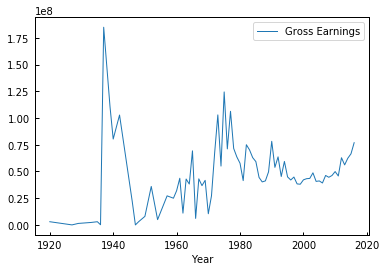

In [226]:
earnings_by_year.plot()
plt.show()

In [229]:
# 提取部分数据，设置多列为index
movies_subset = movies[['Country', 'Language', 'Gross Earnings']]
# movies_subset.head()
earnings_by_co_lang = movies_subset.pivot_table(index=['Country', 'Language'])
earnings_by_co_lang.head(10)

Gross Earnings
Country     Language                  
Afghanistan Dari          1.127331e+06
Argentina   Spanish       7.230936e+06
Aruba       English       1.007614e+07
Australia   Aboriginal    6.165429e+06
            Dzongkha      5.052950e+05
            English       4.204944e+07
Belgium     English       6.805665e+05
Brazil      Portuguese    2.712574e+06
Cameroon    English       3.263100e+04
Canada      English       2.341358e+07

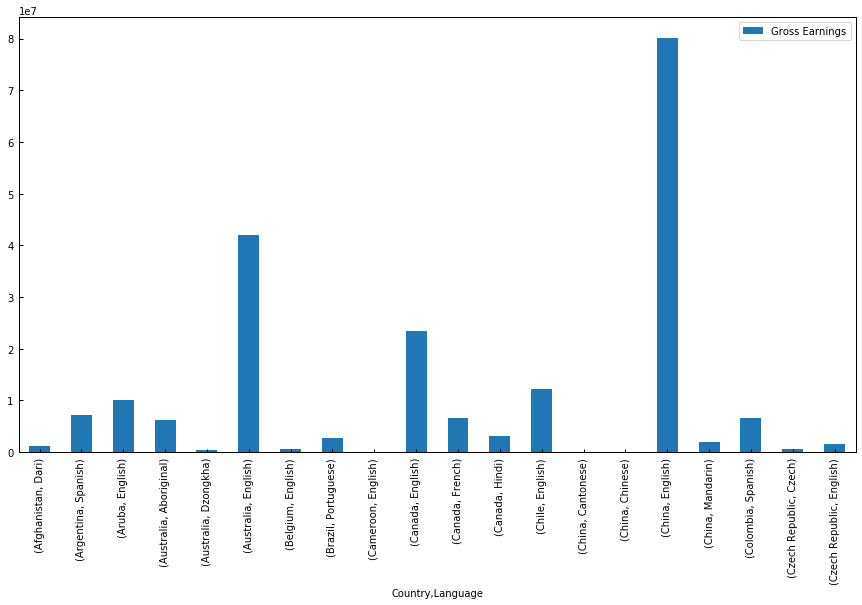

In [231]:
earnings_by_co_lang.head(20).plot(kind='bar', figsize=(15,8))
plt.show()

In [348]:
# 返璞归真：single var object memory allocate:
x = 10
print(id(x))
# x = 5
# print(id(x))
# x = 10
# print(id(x))

4493560464
4493560304
4493560464


In [346]:
# multiple names points to one object:
x = 10
y = x
# y = 10
print('x = %d, y= %d' %(x, y))
print('mem_id(x) = %d, mem_id(y)= %d' %(id(x),id(y)))

x = 10, y= 10
mem_id(x) = 4493560464, mem_id(y)= 4493560464


In [333]:
x = 10
y = 11
print('x = %d, y= %d' %(x, y))
print('mem_id(x) = %d, mem_id(y)= %d' %(id(x),id(y)))

x = 10, y= 11
mem_id(x) = 4493560464, mem_id(y)= 4493560496


In [379]:
x = np.arange(10)
y = x
x = x + 1
# x[[2,3]]=55
print('x = %a, y= %a' %(x, y))
print('mem_id(x) = %d, mem_id(y)= %d' %(id(x),id(y)))

x = array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), y= array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
mem_id(x) = 5585493168, mem_id(y)= 5585491888


In [ ]:
#%% -------- array tricks ---------
x = np.arange(10)
ix = np.array([8, 9])
x[ix][0] = 100
print(x)

In [ ]:
x = np.arange(10)
ix = np.array([8, 9])
x[ix[0]] = 100
print(x)

In [341]:
x = np.arange(10)
x2 = x[8:10]
x2[0] = 100
print(x)

In [ ]:
# print np.array_str(x, precision=2, suppress_small=True)
def gau1(ax_arr,*p0):
    c0,mu0,sgm0 = p0[0], p0[1], p0[2]
    c1,mu1,sgm1 = p0[3], p0[4], p0[5]
    gau0_arr = c0 * np.exp(-(ax_arr - mu0) ** 2 /(2* sgm0**2))
    gau1_arr = c1 * np.exp(-(ax_arr - mu1) ** 2 /(2* sgm1**2))
    return gau0_arr+gau1_arr

p0 = [c0, mu0, sgm0, c1, mu1, sgm1]
pfit = curve_fit(gau1, ax_arr, Tb_arr, p0=p0, \
                 ftol=0.2, xtol=0.2, maxfev=200)[0]
Tb_fit = gau1(spx_v0,*pfit)

In [44]:
len(y0_arr)

60

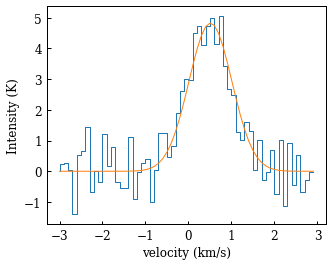

In [53]:
from scipy.optimize import curve_fit

def gau0_fun(ax_arr,*p0):
    d2s = np.sqrt(np.log(2) * 8)
    c0,mu0,hm = p0[0], p0[1], p0[2]
    gau0_arr = c0 * np.exp(-(ax_arr - mu0) ** 2 /(2* (hm/d2s)**2))
    return gau0_arr

# ---------- artifical data for the test -----------
x0_arr = np.arange(-3, 3, 0.1)
p0_a = [5, 0.5, 1.2]
y0_arr = gau0_fun(x0_arr, *p0_a) + np.random.randn(len(x0_arr))*0.7

# ---------- using the model function to fit the data ------------ 
p0_ini = [4.5, 0.7, 1.3]
p0_fit = curve_fit(gau0_fun, x0_arr, y0_arr, p0=p0_ini, \
                 ftol=0.1, xtol=0.1, maxfev=200)[0]

y0_fit = gau0_fun(x0_arr, *p0_fit)

fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x0_arr, y0_arr, drawstyle='steps')
ax1.plot(x0_arr, y0_fit)
ax1.set_xlabel('velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
plt.show()

In [47]:
dv_bp = 160    # window width km/s
f_rw = (dv_bp * 1e5 / c) * 1250  # MHz
n_rw = int(f_rw / df)-1
v_s0 = -24.9759     # km/s , # system velocity shift --- frequency.
v_ax1 = np.linspace(-dv_bp, dv_bp, 2*n_rw)   # fixed size of axis.
sp_rrl_m = np.zeros((20, 2 * n_rw))

def sp_base0(v_ax1, spec_tp, v_mask=[-65, 65]):
    dv_sp0, dv_sp1 = 15, 15   # km/s
    # v_mask = [-70, 70]
    n_sp = int(dv_bp * 2 / dv_sp0) + 1
    v_ax_sp = np.linspace(v_ax1.min(), v_ax1.max(), n_sp)
    iv = np.where((v_ax_sp > v_mask[0]) & (v_ax_sp < v_mask[1]))[0]
    ic = iv[0]-1
    v_ax_sp = np.delete(v_ax_sp, iv)
    n_sp = len(v_ax_sp)   # spline array length update.
    spec_sp = np.zeros(n_sp)
    for i in np.arange(n_sp):
        iv_sp = np.where(np.abs(v_ax1 - v_ax_sp[i]) < dv_sp1)
        spec_sp[i] = np.mean(spec_tp[iv_sp])
    v_c = (v_ax_sp[ic] + v_ax_sp[ic+1]) / 2
    sp_c = (spec_sp[ic] + spec_sp[ic+1]) / 2 * 0.85
    v_ax_sp = np.insert(v_ax_sp, ic+1, v_c)
    spec_sp = np.insert(spec_sp, ic+1, sp_c)
    # spline fitting array:
    f1 = interp1d(v_ax_sp, spec_sp, kind='cubic')
    return f1(v_ax1)

base_line = sp_base0(v_ax1, spec_bas0, v_mask)
spec_bas1 = spec_bas0 - base_line

3

Text(0,0.5,'Intensity (K)')

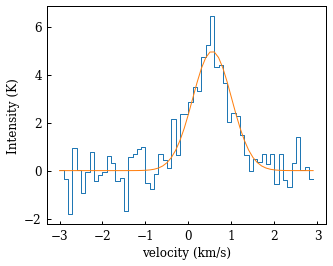

In [ ]:
https://tinyurl.com/yxdelw8x

In [ ]:
https://tinyurl.com/yxdelw8x

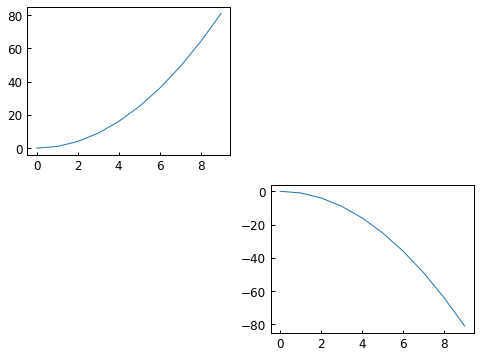

In [21]:
x=np.arange(10)
y=x**2
fig = plt.figure(1,figsize=(8,6))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x,y)
ax2 = fig.add_subplot(2,2,4)
ax2.plot(x,-y)